#**PENYAJIAN INFORMASI KESEHATAN SEBAGAI EDUKASI PUBLIK**


> **KELOMPOK CAT LOVERS 2023A**

1. Marshanda Claudia Iswahyono (23031554014)
2. Dayinta Agustina Zanuel (23031554042)
3. Zulma Nayla Ifaada (23031554063)


> **LINK WEBSITE**

https://www.cdc.gov/



> **REFERENSI**

https://academic.oup.com/phe/article/13/1/111/5803159?login=false

https://ieeexplore.ieee.org/document/10409723

http://dx.doi.org/10.14257/ijdta.2014.7.1.06

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0037715


#**SCRAPPING**

In [ ]:
import requests as req                                                           #Melakukan perintah mengambil data dari web
from bs4 import BeautifulSoup as bs                                              #Mempermudah dalam scrapping
import pandas as pd                                                              #Manipulasi data berbasis tabel (DataFrame)
import seaborn as sns                                                            #Menyediakan alat untuk membuat grafik statistik yang menarik
import matplotlib.pyplot as plt                                                  #Mendukung pembuatan grafik dasar yang fleksibel.
import numpy as np                                                               #Operasi numerik seperti perhitungan matematis
import re                                                                        #manipulasi teks menggunakan pola reguler
import string                                                                    #manipulasi karakter seperti penghapusan tanda baca
import nltk                                                                      #menyediakan alat untuk pemrosesan bahasa alami (NLP), seperti penghapusan kata-kata umum (stopwords), tokenisasi kata, dan stemming untuk mendapatkan akar kata.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
!pip install selenium                                                            #alat otomatisasi peramban web yang digunakan untuk scraping situs web dinamis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install webdriver-manager                                                   #mempermudah pengelolaan driver peramban untuk Selenium

In [ ]:
url = 'https://www.cdc.gov/'
response = req.get(url, verify=False)                                            #digunakan untuk mengirim permintaan HTTP GET
if response.status_code == 200:
    print("Successfully fetched the webpage")
    print(response.text[:1000])                                                  #1000 karakter pertama dari konten halaman dicetak untuk inspeksi
else:
    print(f"Failed to fetch the webpage, status code: {response.status_code}")

Successfully fetched the webpage
<!DOCTYPE html>
<html lang="en-us" class="cdc-theme-cdcroot cdc-root-home cdc-page-type--2024home" >
<head>
	
<meta charset="UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport" />
<meta name="mobile-web-app-capable" content="yes" />
<meta name="apple-mobile-web-app-capable" content="yes" />

<link rel="apple-touch-icon" sizes="180x180" href="/TemplatePackage/5.0/img/favicon/apple-touch-icon.png">
<link rel="icon" type="image/png" sizes="32x32" href="/TemplatePackage/5.0/img/favicon/favicon-32x32.png">
<link rel="icon" type="image/png" sizes="16x16" href="/TemplatePackage/5.0/img/favicon/favicon-16x16.png">
<link rel="mask-icon" href="/TemplatePackage/5.0/img/favicon/safari-pinned-tab.svg" color="#0056b3">
<meta name="msapplication-TileColor" content="#0056b3">
<meta name="theme-color" content="#0056b3">
<link rel="stylesheet" href="/TemplatePackage/5.0/cs

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cdc.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
bacaanpages  = response.text                                                     #menyimpan konten lengkap dari halaman web yang telah diambil sebelumnya
bacaanpages

'<!DOCTYPE html>\r\n<html lang="en-us" class="cdc-theme-cdcroot cdc-root-home cdc-page-type--2024home" >\r\n<head>\r\n\t\r\n<meta charset="UTF-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport" />\r\n<meta name="mobile-web-app-capable" content="yes" />\r\n<meta name="apple-mobile-web-app-capable" content="yes" />\r\n\r\n<link rel="apple-touch-icon" sizes="180x180" href="/TemplatePackage/5.0/img/favicon/apple-touch-icon.png">\r\n<link rel="icon" type="image/png" sizes="32x32" href="/TemplatePackage/5.0/img/favicon/favicon-32x32.png">\r\n<link rel="icon" type="image/png" sizes="16x16" href="/TemplatePackage/5.0/img/favicon/favicon-16x16.png">\r\n<link rel="mask-icon" href="/TemplatePackage/5.0/img/favicon/safari-pinned-tab.svg" color="#0056b3">\r\n<meta name="msapplication-TileColor" content="#0056b3">\r\n<meta name="theme-color" content="#0056b3">\r\n<link rel="stylesheet" href="/Templ

In [ ]:
soup = bs(bacaanpages, 'html.parser')                                            #Parsing HTML dengan BeautifulSoup
a_to_z_section = soup.find('section', {'class': 'health-topics'})                #Menemukan bagian huruf A sampai Z

data_list = []                                                                   # Siapkan daftar untuk mengumpulkan data kategori

if a_to_z_section:
    links = a_to_z_section.find_all('li')                                        # Temukan semua tautan dalam bagian A hingga Z

    for link in links:
        category_name = link.find('a').text.strip()                              # Get the text (e.g., A, B, C)
        category_link = link.find('a')['href'].strip()                           # Get the href link
        data_list.append([category_name, category_link])

category_data = pd.DataFrame(data_list, columns=['Huruf', 'Link Kategori'])      # Ubah data menjadi DataFrame

pd.set_option('display.max_colwidth', None)                                      # Menampilkan DataFrame
category_data

,Huruf,Link Kategori
0,A,https://www.cdc.gov/health-topics.html#A
1,B,https://www.cdc.gov/health-topics.html#B
2,C,https://www.cdc.gov/health-topics.html#C
3,D,https://www.cdc.gov/health-topics.html#D
4,E,https://www.cdc.gov/health-topics.html#E
5,F,https://www.cdc.gov/health-topics.html#F
6,G,https://www.cdc.gov/health-topics.html#G
7,H,https://www.cdc.gov/health-topics.html#H
8,I,https://www.cdc.gov/health-topics.html#I
9,J,https://www.cdc.gov/health-topics.html#J


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

all_data = []

for _, row in category_data.iterrows():                                          # Ulangi setiap baris dalam category_data DataFrame
    letter = row['Huruf']                                                        # Huruf seperti 'A', 'B', dst.
    url = row['Link Kategori']                                                   # URL yang sesuai untuk huruf tersebut

    try:
        print(f"Processing data for letter: {letter}")

        options = webdriver.FirefoxOptions()                                     # Buat instance WebDriver baru untuk setiap URL
        options.add_argument("--headless")
        driver = webdriver.Firefox(options=options)

        driver.get(url)

        links = driver.find_elements(By.CSS_SELECTOR, f"div.row.char-block[data-id='{letter}'] li a") # Temukan semua tautan untuk surat saat ini
        num_links = len(links)                                                   # Jumlah artikel ditemukan
        if not links:
            print(f"No links found for letter {letter}")
        else:
            print(f"Found {num_links} links for letter {letter}")
        data = [{"Huruf": letter,"Title": link.text.strip(), "Link": link.get_attribute("href")} for link in links]
        all_data.extend(data)                                                    # Tambahkan artikel ke daftar utama
        driver.quit()                                                            # Tutup driver untuk URL ini

    except Exception as e:
        print(f"Error processing data for letter {letter}: {e}")

articles_df = pd.DataFrame(all_data,columns=['Huruf','Link','Title'])            # Ubah data yang dikumpulkan menjadi DataFrames
articles_df

Processing data for letter: A
Found 103 links for letter A
Processing data for letter: B
Found 75 links for letter B
Processing data for letter: C
Found 181 links for letter C
Processing data for letter: D
Found 55 links for letter D
Processing data for letter: E
Found 90 links for letter E
Processing data for letter: F
Found 81 links for letter F
Processing data for letter: G
Found 48 links for letter G
Processing data for letter: H
Found 124 links for letter H
Processing data for letter: I
Found 72 links for letter I
Processing data for letter: J
Found 7 links for letter J
Processing data for letter: K
Found 9 links for letter K
Processing data for letter: L
Found 53 links for letter L
Processing data for letter: M
Found 85 links for letter M
Processing data for letter: N
Found 69 links for letter N
Processing data for letter: O
Found 49 links for letter O
Processing data for letter: P
Found 137 links for letter P
Processing data for letter: Q
Found 2 links for letter Q
Processing da

,Huruf,Link,Title
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,Abdominal Aortic Aneurysm — see Aortic Aneurysm
1,A,https://www.cdc.gov/reproductive-health/data-statistics/abortion-surveillance-system.html,Abortion Surveillance
2,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,"Abuse, Child — see Child Abuse and Neglect Prevention"
3,A,https://www.cdc.gov/elder-abuse/about/index.html,"Abuse, Elder — see Elder Abuse"
4,A,https://www.cdc.gov/child-abuse-neglect/about/about-abusive-head-trauma.html,Abusive Head Trauma
...,...,...,...
1684,#,https://www.cdc.gov/hearing-loss/about/index.html,— see
1685,#,https://www.cdc.gov/alcohol/,— see Alcohol Use
1686,#,https://www.cdc.gov/hemophilia/testing/index.html,— see Clotting Disorders
1687,#,https://www.cdc.gov/nndss/about/index.html,— see NNDSS Modernization Initiative (NMI)


In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs

data_list = []
for _, row in articles_df.iterrows():                                            #Mengiterasi setiap baris dalam DataFrame articles_df
    url = row['Link']
    Huruf = row['Huruf']

    try:
        response = req.get(url)                                                  #Mengirim permintaan HTTP GET ke URL yang diberikan untuk mengambil isi halaman web.
        response.raise_for_status()
        soup = bs(response.text, 'html.parser')                                  #Mengubah konten HTML dari response menjadi objek BeautifulSoup untuk memudahkan pengambilan elemen.

        title_tag = soup.find('div', class_='cdc-page-title cdc-page-offset syndicate') #Mengambil judul artikel
        article_title = title_tag.h1.text.strip() if title_tag else ""

        date_tag = soup.find('time', class_='cdc-page-title-bar__item cdc-page-title-bar__item--date') #Mengambil tanggal publikasi
        publication_date = date_tag.text.strip() if date_tag else ""

        key_points_section = soup.find('div', class_='dfe-section__content')     #Mengambil key points
        if key_points_section:
            key_points = [li.text.strip() for li in key_points_section.find_all('li', class_='level-1')]
        else:
            key_points = ""
        data_list.append([Huruf,url,article_title, publication_date, key_points]) #Menyimpan data

    except Exception as e:                                                       #Penanganan eror
        print(f"Failed to process {url}. Error: {e}")
data_df = pd.DataFrame(data_list, columns=['Huruf','Link','Title', 'Publication Date', 'Key Points'])
data_df


Failed to process https://www.atsdr.cdc.gov/placeandhealth/svi/index.html. Error: 404 Client Error: Not Found for url: https://www.atsdr.cdc.gov/placeandhealth/svi/index.html
Failed to process https://www.cdc.gov/healthy-schools/bam/teachers.htm. Error: 404 Client Error: Not Found for url: https://www.cdc.gov/healthy-schools/bam/teachers.htm
Failed to process https://www.cdc.gov/healthy-schools/vhs/index.html. Error: 404 Client Error: Not Found for url: https://www.cdc.gov/healthy-schools/vhs/index.html
Failed to process https://www.cdc.gov/healthyweight/assessing/bmi/adult_BMI/english_bmi_calculator/bmi_calculator.html. Error: 404 Client Error: Not Found for url: https://www.cdc.gov/healthyweight/assessing/bmi/adult_BMI/english_bmi_calculator/bmi_calculator.html
Failed to process https://www.cdc.gov/infectious-diseases-labs/drugservice/. Error: 404 Client Error: Not Found for url: https://www.cdc.gov/infectious-diseases-labs/drugservice/
Failed to process https://www.cdc.gov/features/

,Huruf,Link,Title,Publication Date,Key Points
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","[An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.]"
1,A,https://www.cdc.gov/reproductive-health/data-statistics/abortion-surveillance-system.html,CDC's Abortion Surveillance System FAQs,"November 27, 2024",[]
2,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","[Child abuse and neglect are serious public health problems., Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.]"
3,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","[Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust., More research is needed to uncover the causes for, and solutions to, violence against older adults.]"
4,A,https://www.cdc.gov/child-abuse-neglect/about/about-abusive-head-trauma.html,About Abusive Head Trauma,"May 16, 2024","[Abusive head trauma is a leading cause of child abuse deaths in children under five., Abusive head trauma can be prevented by understanding the dangers of shaking a baby and offering support to parents and caregivers.]"
...,...,...,...,...,...
1640,#,https://www.cdc.gov/hearing-loss/about/index.html,About Noise-Induced Hearing Loss,"April 12, 2024","[Noise is all around us — at school, at home, and everywhere in between., Noise is a significant source of hearing loss., Prevention and early detection of hearing loss due to noise are important., Recognize signs of hearing loss and get your hearing tested if you are at risk.]"
1641,#,https://www.cdc.gov/alcohol/,Alcohol Use,,[]
1642,#,https://www.cdc.gov/hemophilia/testing/index.html,Diagnosing Hemophilia,"May 15, 2024","[Hemophilia is diagnosed using screening tests followed by more specific clotting factor tests., Screening tests show if blood is clotting properly., Clotting factor tests indicate whether a person has hemophilia, the type of hemophilia, and the severity.]"
1643,#,https://www.cdc.gov/nndss/about/index.html,About National Notifiable Diseases Surveillance System,"November 20, 2024",[]


# PREPROCESSING

In [ ]:
!pip install nltk                                                                #pemrosesan bahasa alami (Natural Language Processing, NLP), seperti tokenisasi, stemming, lemmatization, analisis sintaksis, dan analisis teks lainnya.

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
import nltk
from nltk.corpus import stopwords                                                #Mengimpor daftar kata-kata umum (stopwords) yang biasanya dihapus selama proses pembersihan teks.
from nltk.tokenize import word_tokenize                                          #Mengimpor fungsi untuk memisahkan teks menjadi kata-kata (tokenisasi).
from nltk.stem import SnowballStemmer                                            #Mengimpor algoritma stemming, yang mengurangi kata-kata menjadi bentuk dasarnya (stem).
import pandas as pd
import re
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
duplicate_rows_title_link = data_df[data_df.duplicated(subset=['Title', 'Link'], keep=False)]

if not duplicate_rows_title_link.empty:                                          #Cek duplikasi
    print("\nDuplicate Rows based on 'Title' and 'Link':")
    display(duplicate_rows_title_link)
else:
    print("\nNo duplicate rows found based on 'Title' and 'Link'.")              #Mengambil hasil


Duplicate Rows based on 'Title' and 'Link':


,Huruf,Link,Title,Publication Date,Key Points
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","[An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.]"
2,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","[Child abuse and neglect are serious public health problems., Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.]"
3,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","[Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust., More research is needed to uncover the causes for, and solutions to, violence against older adults.]"
5,A,https://www.cdc.gov/acanthamoeba/about/,About Acanthamoeba Infections,"October 10, 2024","[Acanthamoeba is a free-living ameba, a kind of one-celled organism that lives in water, soil, and dust., Most people will come into contact with Acanthamoeba at some point, but most won't get sick. Although rare, some people develop serious Acanthamoeba infections that are often fatal., See a healthcare provider right away if you have symptoms of an Acanthamoeba infection.]"
6,A,https://www.cdc.gov/public-health-gateway/php/our-work/health-department-accreditation.html,Accreditation: National Voluntary Program,"May 15, 2024",[]
...,...,...,...,...,...
1639,#,https://www.cdc.gov/diphtheria/,Diphtheria,,[]
1640,#,https://www.cdc.gov/hearing-loss/about/index.html,About Noise-Induced Hearing Loss,"April 12, 2024","[Noise is all around us — at school, at home, and everywhere in between., Noise is a significant source of hearing loss., Prevention and early detection of hearing loss due to noise are important., Recognize signs of hearing loss and get your hearing tested if you are at risk.]"
1641,#,https://www.cdc.gov/alcohol/,Alcohol Use,,[]
1642,#,https://www.cdc.gov/hemophilia/testing/index.html,Diagnosing Hemophilia,"May 15, 2024","[Hemophilia is diagnosed using screening tests followed by more specific clotting factor tests., Screening tests show if blood is clotting properly., Clotting factor tests indicate whether a person has hemophilia, the type of hemophilia, and the severity.]"


In [ ]:
data_df.drop_duplicates(subset=['Title', 'Link'], inplace=True) # Contoh: hapus duplikat berdasarkan kolom 'Judul' dan 'Tautan'
data_df

,Huruf,Link,Title,Publication Date,Key Points
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","[An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.]"
1,A,https://www.cdc.gov/reproductive-health/data-statistics/abortion-surveillance-system.html,CDC's Abortion Surveillance System FAQs,"November 27, 2024",[]
2,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","[Child abuse and neglect are serious public health problems., Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.]"
3,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","[Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust., More research is needed to uncover the causes for, and solutions to, violence against older adults.]"
4,A,https://www.cdc.gov/child-abuse-neglect/about/about-abusive-head-trauma.html,About Abusive Head Trauma,"May 16, 2024","[Abusive head trauma is a leading cause of child abuse deaths in children under five., Abusive head trauma can be prevented by understanding the dangers of shaking a baby and offering support to parents and caregivers.]"
...,...,...,...,...,...
1627,Y,https://www.cdc.gov/niosh/young-workers/,About Young Worker Safety and Health,"March 15, 2024","[Employers are responsible for providing young workers with a safe and healthy workplace., Young workers may have little or no prior work experience. They also have high rates of job-related injuries., Young workers can practice basic safety skills to protect themselves on the job.]"
1629,Y,https://www.cdc.gov/youth-violence/about/index.html,About Youth Violence,"February 15, 2024","[Youth violence is a serious public health problem., Youth violence can have long-term impacts on health, opportunity, and well-being.]"
1630,Z,https://www.cdc.gov/zika/index.html,Zika Virus,,[]
1635,#,https://www.cdc.gov/nbs/,National Electronic Disease Surveillance System Base System,,[]


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))                                     # Inisialisasi kata henti dan lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_article(msg):
    """Clean and lemmatize a single article string."""
    if isinstance(msg, list):                                                    # Jika ini adalah daftar string
        msg = " ".join(msg)                                                      # Gabungkan semua string menjadi satu
    if not isinstance(msg, str):                                                 # Pastikan inputnya adalah string
        return ""
    msg = msg.lower()
    msg = re.sub(r'\d+', '', msg)                                                # Hapus nomor
    msg = re.sub(r'https?://[^\s\n\r]+', '', msg)                                # Hapus hyperlinks
    msg = re.sub(r'[^\x00-\x7f]', r'', msg)                                      # Hapus karakter non-ASCII
    msg = re.sub(rf"[{re.escape(string.punctuation)}]", " ", msg)                # Ganti tanda baca dengan spasi
    msg = ' '.join(msg.split())                                                  # Hapus spasi tambahan
    msg = re.sub(r'\babout\b', '', msg)                                          # Hapus "about"
    cleaned_words = [
        lemmatizer.lemmatize(word) for word in msg.split() if word not in stop_words
    ]
    return ' '.join(cleaned_words)

data_df['Key Points Cleaned'] = data_df['Key Points'].apply(clean_article)       # Terapkan fungsi ke dataset
data_df['Title Cleaned'] = data_df['Title'].apply(clean_article)

data_df['Key Points Cleaned'] = data_df['Key Points Cleaned'].replace("", np.nan)
data_df['Key Points Cleaned'] = data_df['Key Points Cleaned'].apply(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)

data_df['Title Cleaned'] = data_df['Title Cleaned'].replace("", np.nan)
data_df['Title Cleaned'] = data_df['Title Cleaned'].apply(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)

data_df = data_df[['Huruf', 'Link', 'Title', 'Publication Date', 'Key Points', 'Key Points Cleaned', 'Title Cleaned']]
data_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Huruf,Link,Title,Publication Date,Key Points,Key Points Cleaned,Title Cleaned
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","[An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.]",aortic aneurysm dangerous balloon like bulge aorta large artery carry blood heart chest torso,aortic aneurysm
1,A,https://www.cdc.gov/reproductive-health/data-statistics/abortion-surveillance-system.html,CDC's Abortion Surveillance System FAQs,"November 27, 2024",[],NaN,cdc abortion surveillance system faq
2,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","[Child abuse and neglect are serious public health problems., Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.]",child abuse neglect serious public health problem child abuse neglect long term impact health opportunity well,child abuse neglect
3,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","[Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust., More research is needed to uncover the causes for, and solutions to, violence against older adults.]",many older adult require care vulnerable violence perpetrated caregiver someone trust research needed uncover cause solution violence older adult,abuse older person
4,A,https://www.cdc.gov/child-abuse-neglect/about/about-abusive-head-trauma.html,About Abusive Head Trauma,"May 16, 2024","[Abusive head trauma is a leading cause of child abuse deaths in children under five., Abusive head trauma can be prevented by understanding the dangers of shaking a baby and offering support to parents and caregivers.]",abusive head trauma leading cause child abuse death child five abusive head trauma prevented understanding danger shaking baby offering support parent caregiver,abusive head trauma
...,...,...,...,...,...,...,...
1627,Y,https://www.cdc.gov/niosh/young-workers/,About Young Worker Safety and Health,"March 15, 2024","[Employers are responsible for providing young workers with a safe and healthy workplace., Young workers may have little or no prior work experience. They also have high rates of job-related injuries., Young workers can practice basic safety skills to protect themselves on the job.]",employer responsible providing young worker safe healthy workplace young worker may little prior work experience also high rate job related injury young worker practice basic safety skill protect job,young worker safety health
1629,Y,https://www.cdc.gov/youth-violence/about/index.html,About Youth Violence,"February 15, 2024","[Youth violence is a serious public health problem., Youth violence can have long-term impacts on health, opportunity, and well-being.]",youth violence serious public health problem youth violence long term impact health opportunity well,youth violence
1630,Z,https://www.cdc.gov/zika/index.html,Zika Virus,,[],NaN,zika virus
1635,#,https://www.cdc.gov/nbs/,National Electronic Disease Surveillance System Base System,,[],NaN,national electronic disease surveillance system base system


In [ ]:
data_df.isna().sum()                                                             #Menampilkan jumlah NaN dalam kolom

,0
Huruf,0
Link,0
Title,0
Publication Date,0
Key Points,0
Key Points Cleaned,445
Title Cleaned,94


In [ ]:
data_df.dropna(inplace=True)                                                     #Menghapus nilai NaN
data_df

,Huruf,Link,Title,Publication Date,Key Points,Key Points Cleaned,Title Cleaned
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","[An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.]",aortic aneurysm dangerous balloon like bulge aorta large artery carry blood heart chest torso,aortic aneurysm
2,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","[Child abuse and neglect are serious public health problems., Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.]",child abuse neglect serious public health problem child abuse neglect long term impact health opportunity well,child abuse neglect
3,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","[Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust., More research is needed to uncover the causes for, and solutions to, violence against older adults.]",many older adult require care vulnerable violence perpetrated caregiver someone trust research needed uncover cause solution violence older adult,abuse older person
4,A,https://www.cdc.gov/child-abuse-neglect/about/about-abusive-head-trauma.html,About Abusive Head Trauma,"May 16, 2024","[Abusive head trauma is a leading cause of child abuse deaths in children under five., Abusive head trauma can be prevented by understanding the dangers of shaking a baby and offering support to parents and caregivers.]",abusive head trauma leading cause child abuse death child five abusive head trauma prevented understanding danger shaking baby offering support parent caregiver,abusive head trauma
5,A,https://www.cdc.gov/acanthamoeba/about/,About Acanthamoeba Infections,"October 10, 2024","[Acanthamoeba is a free-living ameba, a kind of one-celled organism that lives in water, soil, and dust., Most people will come into contact with Acanthamoeba at some point, but most won't get sick. Although rare, some people develop serious Acanthamoeba infections that are often fatal., See a healthcare provider right away if you have symptoms of an Acanthamoeba infection.]",acanthamoeba free living ameba kind one celled organism life water soil dust people come contact acanthamoeba point get sick although rare people develop serious acanthamoeba infection often fatal see healthcare provider right away symptom acanthamoeba infection,acanthamoeba infection
...,...,...,...,...,...,...,...
1621,Y,https://www.cdc.gov/yellow-fever/vaccine/index.html,Yellow Fever Vaccine,"May 15, 2024","[Vaccine is recommended for people aged 9 months or older who are traveling to or living in areas at risk for yellow fever virus in Africa and South America., Typically, one dose of the vaccine is safe and provides life-long protection against yellow fever., Some people may have an increased risk of developing a reaction to the vaccine., Talk to your healthcare provider to know if you should receive yellow fever vaccine before you travel.]",vaccine recommended people aged month older traveling living area risk yellow fever virus africa south america typically one dose vaccine safe provides life long protection yellow fever people may increased risk developing reaction vaccine talk healthcare provider know receive yellow fever vaccine travel,yellow fever vaccine
1622,Y,https://www.cdc.gov/yellow-fever/about/index.html,About Yellow Fever,"May 15, 2024","[Yellow fever virus is transmitted to people primarily through the bite of infected mosquitoes., Illness ranges from a fever with aches to severe liver disease with bleeding and yellowing skin and eyes., A vaccine is available for at risk travelers., You can also reduce your risk by avoiding mosquito bites.]",yellow fever virus transmitted people primarily bite infected mosquito illness range fever ache

<ipython-input-16-c153eabcc08d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="viridis")


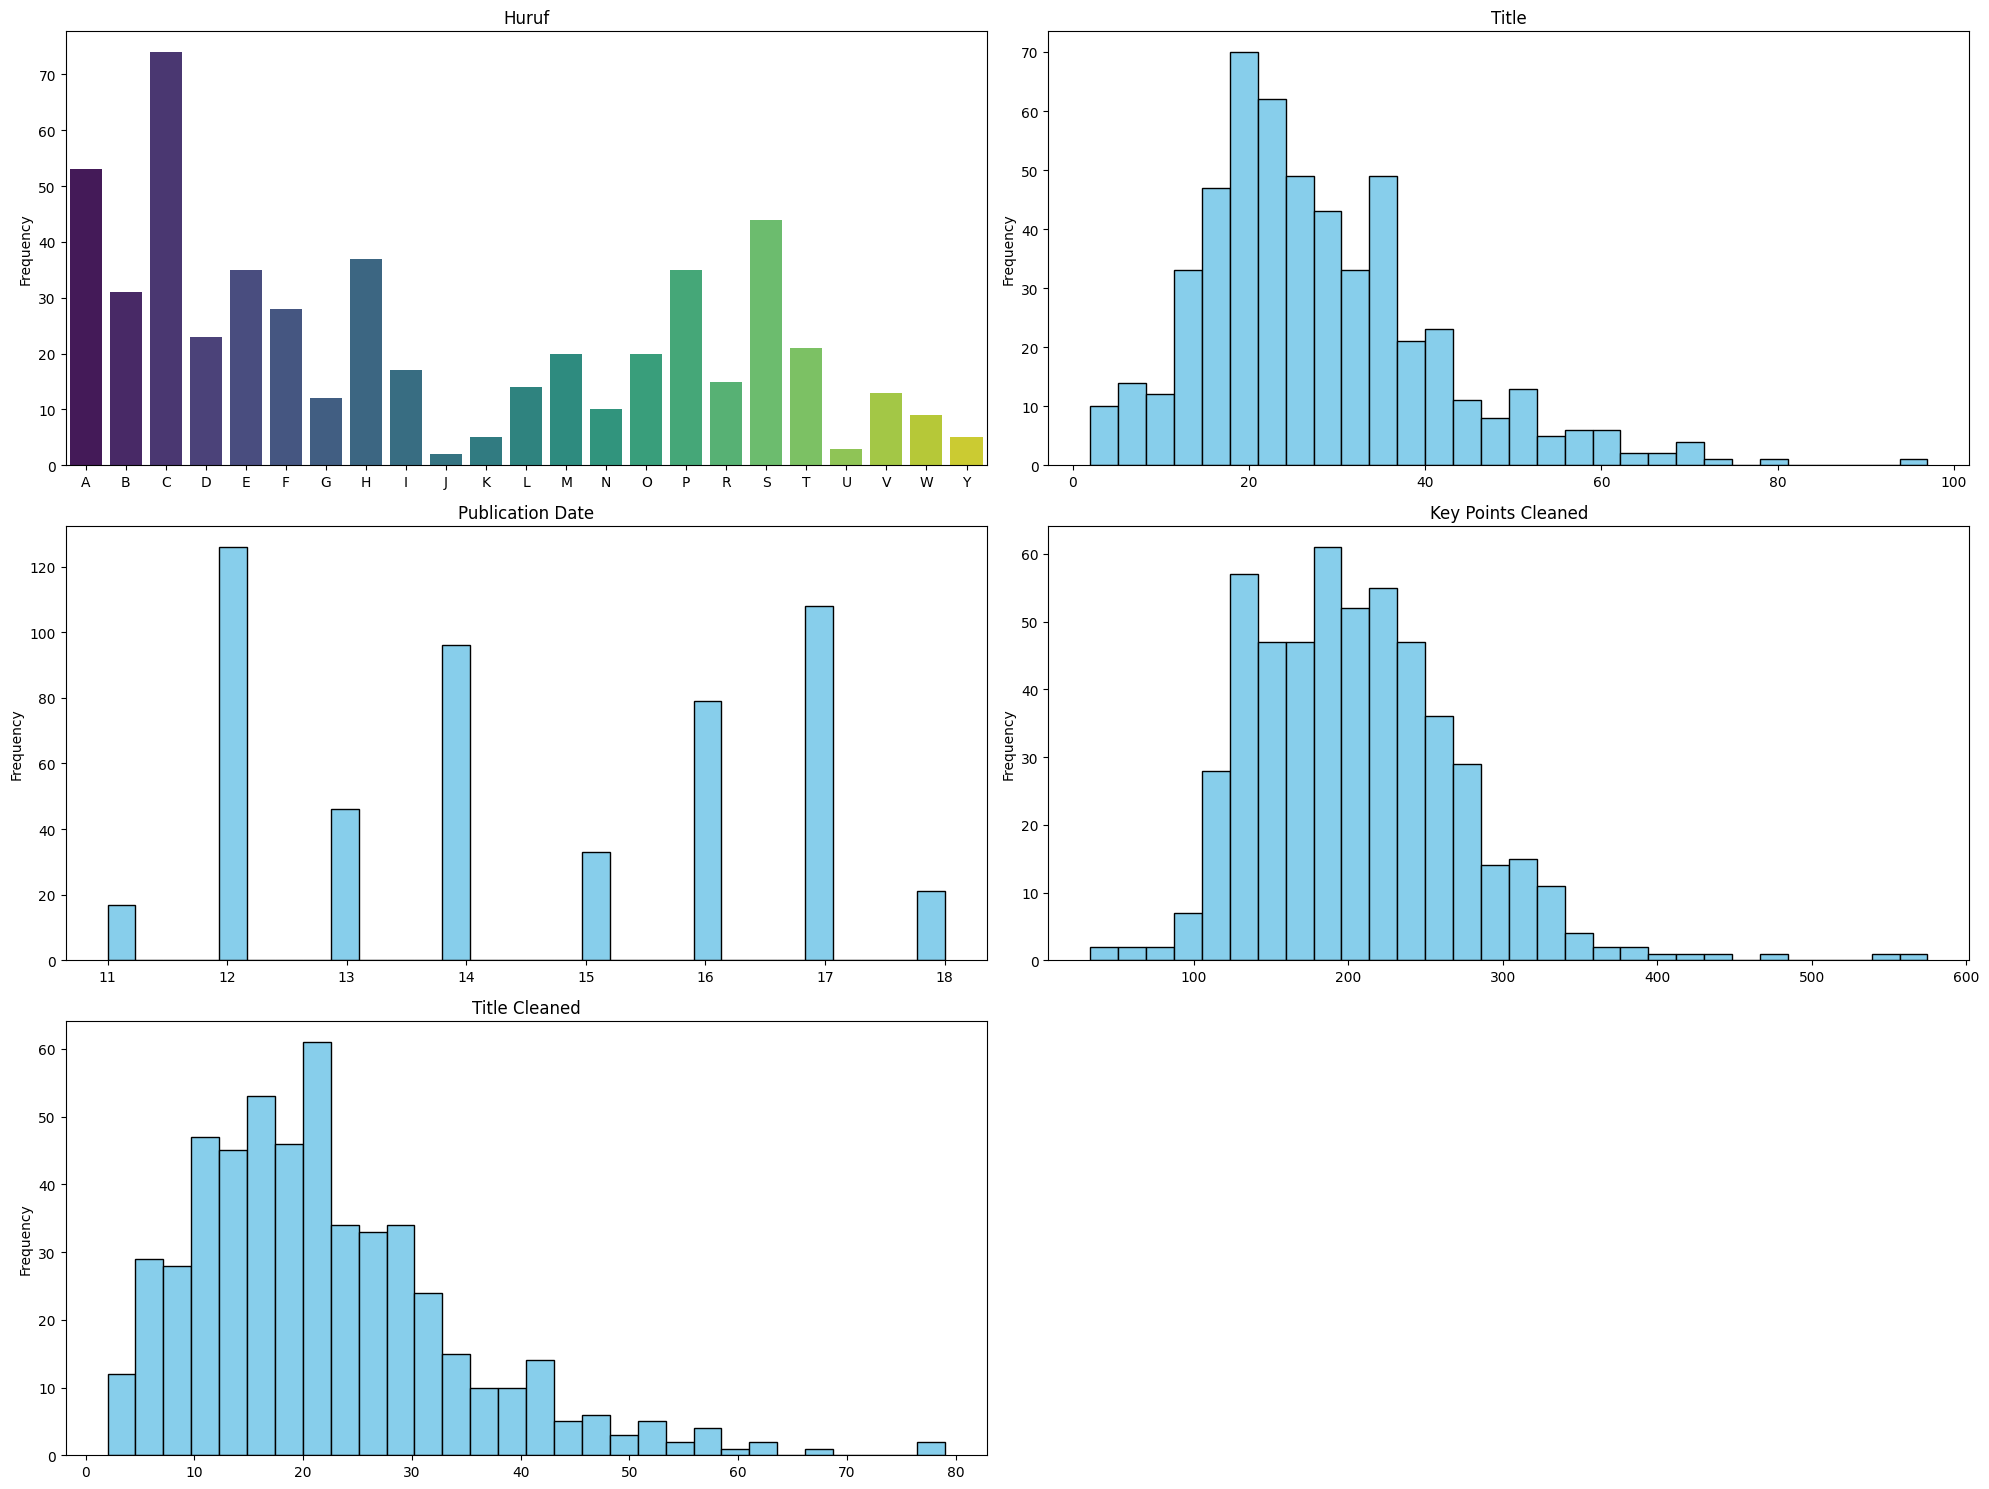

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
columns_to_plot = ['Huruf', 'Title', 'Publication Date', 'Key Points Cleaned', 'Title Cleaned'] # Daftar kolom yang ingin divisualisasikan

for i, column in enumerate(columns_to_plot):                                     # Membuat subplots untuk kolom-kolom
    plt.subplot(3, 2, i + 1)                                                     # Menentukan grid layout 3 baris x 2 kolom
    if column == 'Huruf':                                                        # Kolom kategorikal sederhana
        sns.countplot(x=data_df[column], palette="viridis")
    else:                                                                        # Kolom teks panjang
        data_df[column].str.len().plot.hist(bins=30, ax=plt.gca(), color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
save = data_df.to_csv('bersih.csv', index=False)                                 #Menyimpan data kebentuk csv

#Feature Engineering

##TF IDF

In [ ]:
import pandas as pd
data_df = pd.read_csv('/content/bersih.csv')                                     #Mempresentasikan data
data_df

,Huruf,Link,Title,Publication Date,Key Points,Key Points Cleaned,Title Cleaned
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","['An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.']",aortic aneurysm dangerous balloon like bulge aorta large artery carry blood heart chest torso,aortic aneurysm
1,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","['Child abuse and neglect are serious public health problems.', 'Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.']",child abuse neglect serious public health problem child abuse neglect long term impact health opportunity well,child abuse neglect
2,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","['Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust.', 'More research is needed to uncover the causes for, and solutions to, violence against older adults.']",many older adult require care vulnerable violence perpetrated caregiver someone trust research needed uncover cause solution violence older adult,abuse older person
3,A,https://www.cdc.gov/child-abuse-neglect/about/about-abusive-head-trauma.html,About Abusive Head Trauma,"May 16, 2024","['Abusive head trauma is a leading cause of child abuse deaths in children under five.', 'Abusive head trauma can be prevented by understanding the dangers of shaking a baby and offering support to parents and caregivers.']",abusive head trauma leading cause child abuse death child five abusive head trauma prevented understanding danger shaking baby offering support parent caregiver,abusive head trauma
4,A,https://www.cdc.gov/acanthamoeba/about/,About Acanthamoeba Infections,"October 10, 2024","['Acanthamoeba is a free-living ameba, a kind of one-celled organism that lives in water, soil, and dust.', ""Most people will come into contact with Acanthamoeba at some point, but most won't get sick. Although rare, some people develop serious Acanthamoeba infections that are often fatal."", 'See a healthcare provider right away if you have symptoms of an Acanthamoeba infection.']",acanthamoeba free living ameba kind one celled organism life water soil dust people come contact acanthamoeba point get sick although rare people develop serious acanthamoeba infection often fatal see healthcare provider right away symptom acanthamoeba infection,acanthamoeba infection
...,...,...,...,...,...,...,...
521,Y,https://www.cdc.gov/yellow-fever/vaccine/index.html,Yellow Fever Vaccine,"May 15, 2024","['Vaccine is recommended for people aged 9 months or older who are traveling to or living in areas at risk for yellow fever virus in Africa and South America.', 'Typically, one dose of the vaccine is safe and provides life-long protection against yellow fever.', 'Some people may have an increased risk of developing a reaction to the vaccine.', 'Talk to your healthcare provider to know if you should receive yellow fever vaccine before you travel.']",vaccine recommended people aged month older traveling living area risk yellow fever virus africa south america typically one dose vaccine safe provides life long protection yellow fever people may increased risk developing reaction vaccine talk healthcare provider know receive yellow fever vaccine travel,yellow fever vaccine
522,Y,https://www.cdc.gov/yellow-fever/about/index.html,About Yellow Fever,"May 15, 2024","['Yellow fever virus is transmitted to people primarily through the bite of infected mosquitoes.', 'Illness ranges from a fever with aches to severe liver disease with bleeding and yellowing skin and eyes.', 'A vaccine is available for at risk travelers.', 'You can also reduce your risk by avoiding mosquito bites.']",yellow fever virus transmitted people primarily bite infect

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer                      #Mengubah teks mentah (raw text) menjadi representasi fitur numerik


### Unigram

In [ ]:
# Unigram analysis
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')   #Menghilangkan kata-kata umum dalam bahasa Inggris yang tidak relevan, seperti "and", "the", dll.
unigram_matrix = unigram_vectorizer.fit_transform(data_df['Key Points Cleaned']) #Menyesuaikan model TF-IDF dengan data (proses fitting) dan kemudian mengubah teks menjadi representasi numerik
unigram_features = unigram_vectorizer.get_feature_names_out()                    #Mengambil daftar kata (fitur unik) yang diekstrak dari teks, yang menjadi kolom dalam DataFrame.
unigram_df = pd.DataFrame(unigram_matrix.toarray(), columns=unigram_features)

print("Unigram Analysis:")
unigram_df.head()

Unigram Analysis:


,abdominal,ability,able,abroad,absorbing,abuse,abusive,academic,academy,acanthamoeba,...,yellowing,yersinia,york,young,younger,youre,youth,zaire,zoonotic,zoster
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.525007,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.197100,0.440662,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.755808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


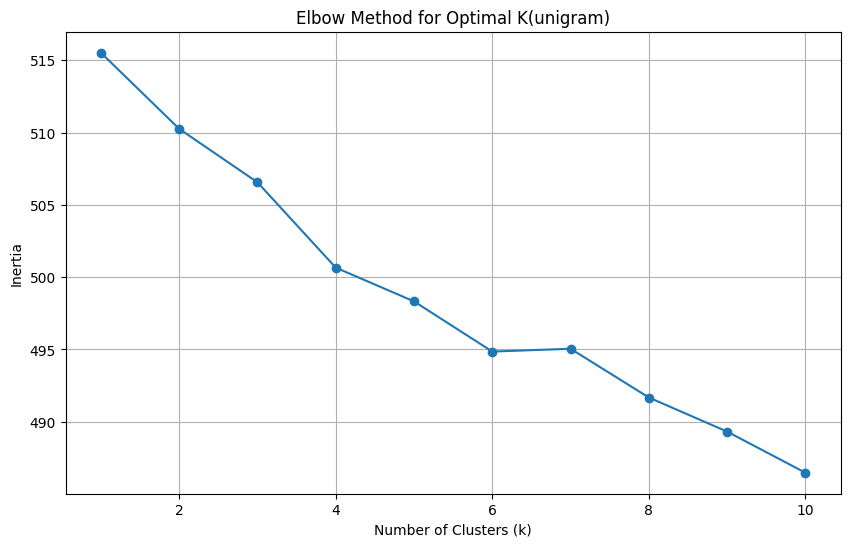

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

inertia = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)                               #Membuat model K-Means untuk jumlah cluster
    kmeans.fit(unigram_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))                                                      # Step 2: Plot the elbow graph
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal K(unigram)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
kunigram = KMeans(n_clusters=6, random_state=1).fit(unigram_matrix)              #Menentukan cluster berdasarkan k-means
kunigram

KMeans(n_clusters=6, random_state=1)

In [ ]:
# silhouette_score                                                               #Mennetukan silhouette score
from sklearn import metrics
labels = kunigram.labels_
silhouette_score = metrics.silhouette_score(unigram_matrix, labels, metric='euclidean')
print(f"TF-IDF Unigram Silhouette Score(KMEANS) : {silhouette_score}")

TF-IDF Unigram Silhouette Score(KMEANS) : 0.008744125226866508


In [ ]:
feature_names = unigram_vectorizer.get_feature_names_out()                       #Memunculkan 20 feature pertama yang memliki score terbesar
tfidf_scores = unigram_matrix.sum(axis=0).A1

tfidf_df = pd.DataFrame({'Feature': feature_names, 'Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='Score', ascending=False)

print("Top 20 Features by TF-IDF Score:")
tfidf_df.head(20)

Top 20 Features by TF-IDF Score:


,Feature,Score
1281,infection,16.305599
1135,health,16.096988
1843,people,15.538140
726,disease,14.257066
354,cause,12.139852
2477,symptom,10.288916
2159,risk,9.518543
2667,vaccine,8.720254
925,exposed,8.653647
2766,worker,8.549263


#### Hierarichal dendogram (Unigram)



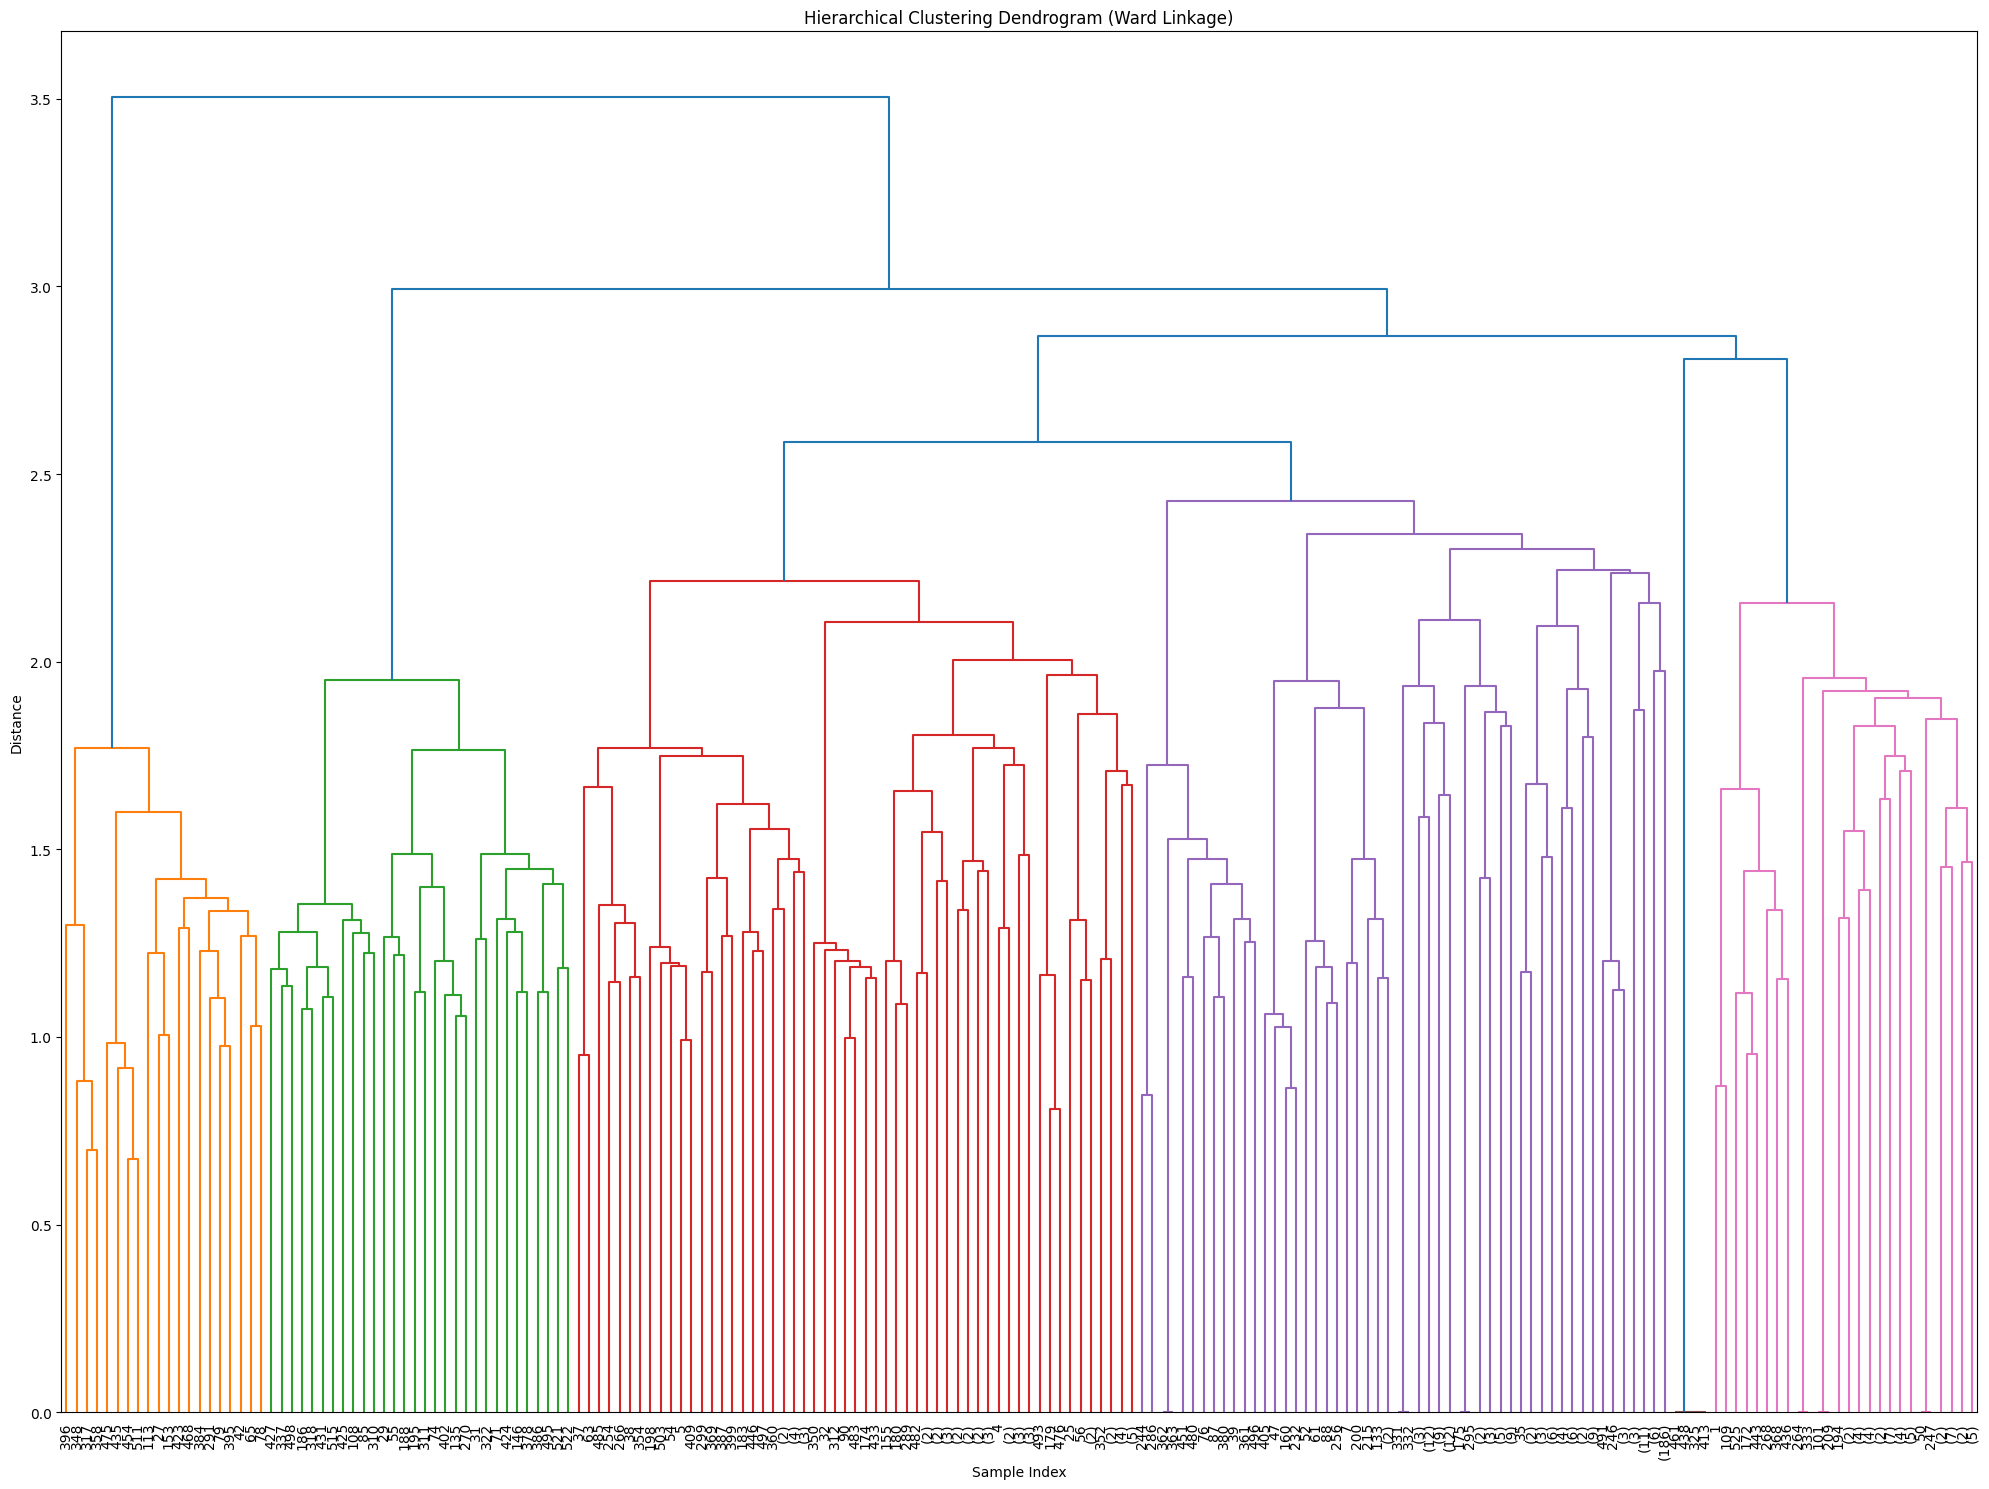

In [ ]:
# ward
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_data = linkage(unigram_matrix.toarray(), method='ward', metric='euclidean') #Memvisualisasikan hierichal dendogram bagian ward

plt.figure(figsize=(20, 15))
dendrogram(linkage_data, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2

clustering_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_ward = clustering_ward.fit_predict(unigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_ward = silhouette_score(unigram_df.to_numpy(), labels_ward)
print(f"Ward Silhouette Score : {silhouette_avg_ward:.2f}")

Ward Silhouette Score : 0.01


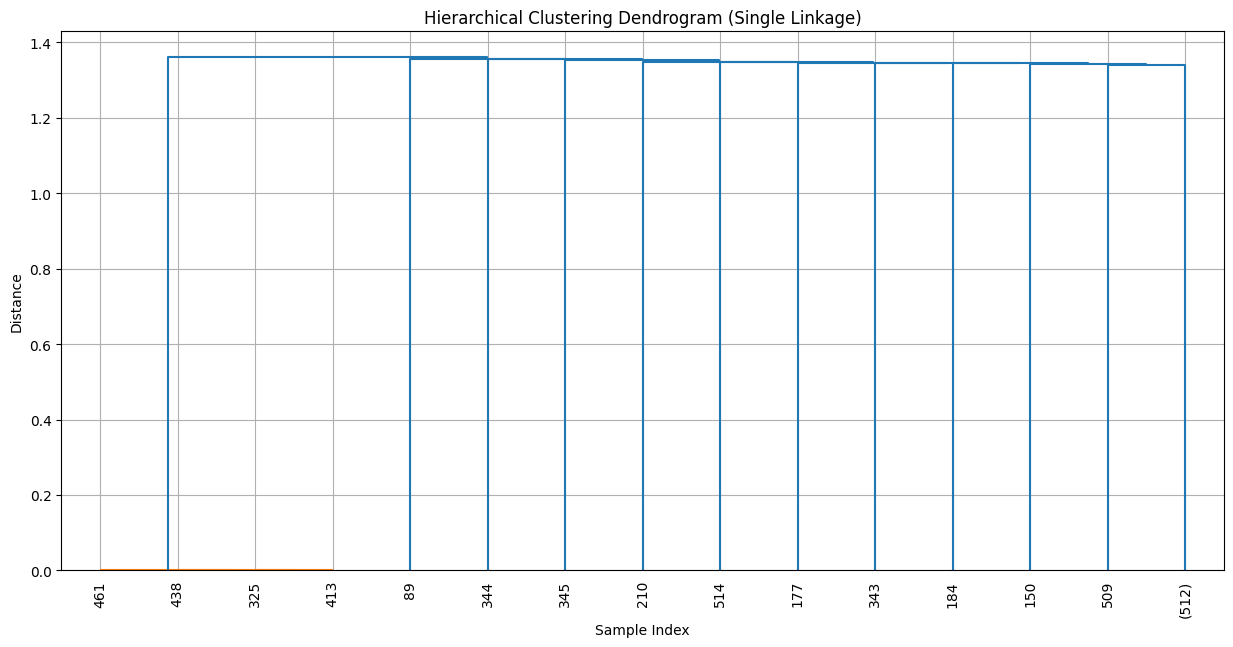

In [ ]:
# Single Linkage
Z_single = linkage(unigram_matrix.toarray(), method='single')

plt.figure(figsize=(15, 7))
dendrogram(Z_single, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2

clustering_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels_single = clustering_single.fit_predict(unigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_single = silhouette_score(unigram_df.to_numpy(), labels_single)
print(f"Single Silhouette Score : {silhouette_avg_single:.2f}")

Single Silhouette Score : 0.01


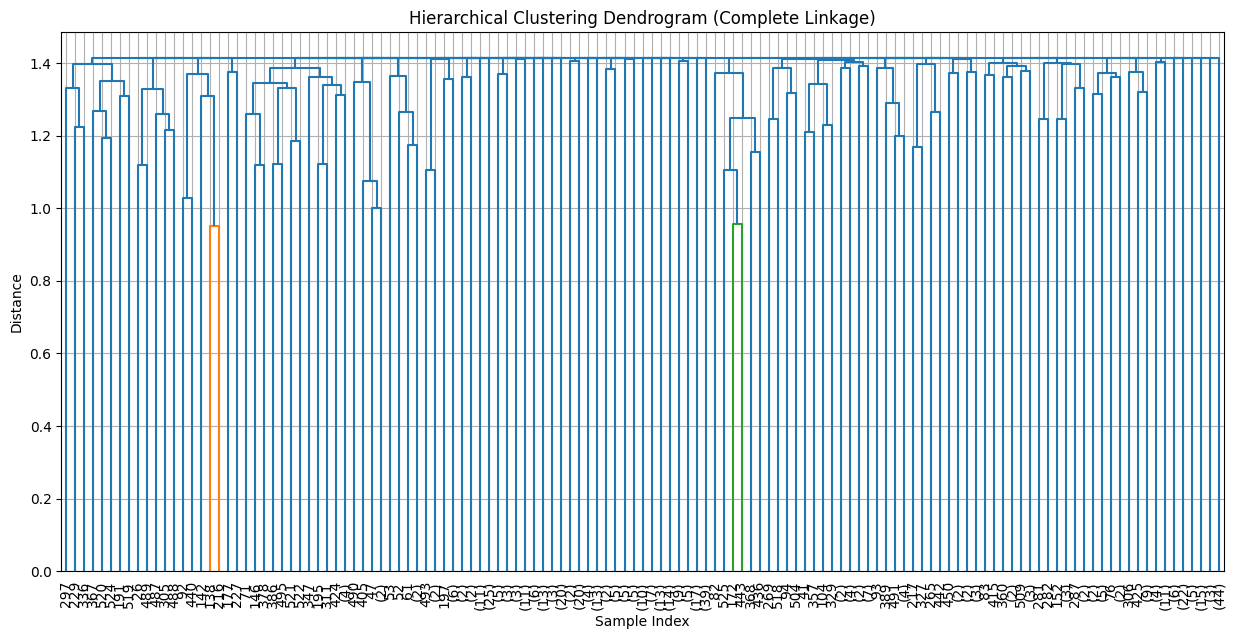

In [ ]:
# Complete Linkage
Z_complete = linkage(unigram_matrix.toarray(), method='complete')

plt.figure(figsize=(15, 7))
dendrogram(Z_complete, truncate_mode='level', p=7, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 45

clustering_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels_complete = clustering_complete.fit_predict(unigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_complete = silhouette_score(unigram_df.to_numpy(), labels_complete)
print(f"Complete Silhouette Score : {silhouette_avg_complete:.2f}")

Complete Silhouette Score : 0.02


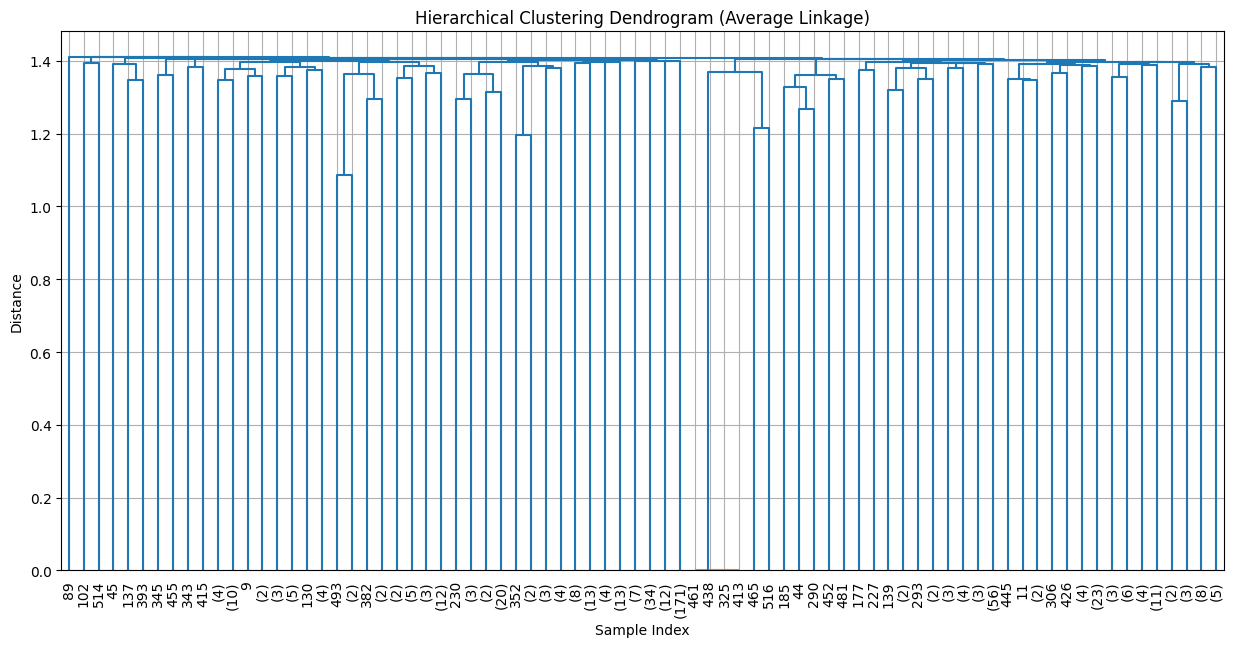

In [ ]:
# Average Linkage
Z_average = linkage(unigram_matrix.toarray(), method='average')

plt.figure(figsize=(15, 7))
dendrogram(Z_average, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3

clustering_average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels_average = clustering_average.fit_predict(unigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_average = silhouette_score(unigram_df.to_numpy(), labels_average)
print(f"average Silhouette Score : {silhouette_avg_average:.2f}")

average Silhouette Score : 0.00


### Bigram

In [ ]:
# Bigram analysis
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(data_df['Key Points Cleaned'])
bigram_features = bigram_vectorizer.get_feature_names_out()
bigram_df = pd.DataFrame(bigram_matrix.toarray(), columns=bigram_features)
print("\nBigram Analysis:")
bigram_df.head()



Bigram Analysis:


,abdominal pain,ability assess,ability function,able prevent,abroad library,absorbing chemical,absorbing workplace,abuse death,abuse long,abuse neglect,...,younger united,younger year,youre pregnant,youth aged,youth happen,youth preventing,youth violence,zaire orthoebolavirus,zoonotic hookworm,zoster lifetime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.534003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207921,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


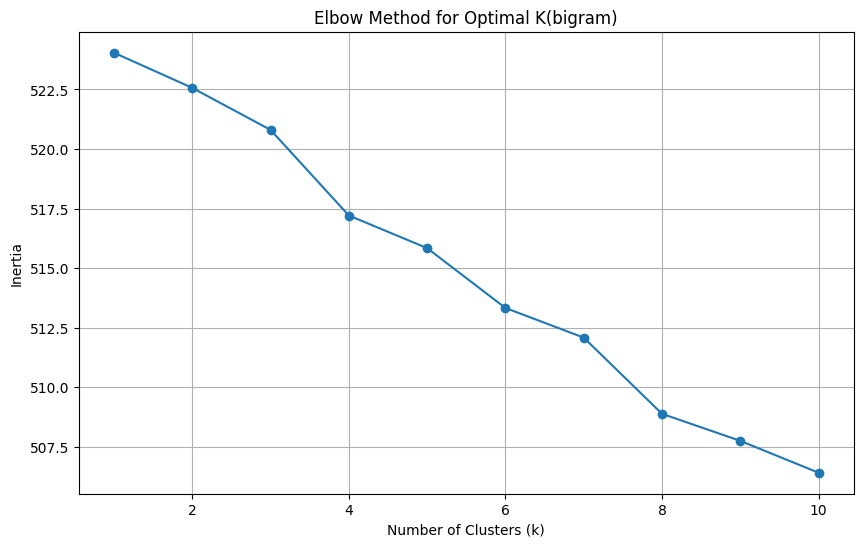

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Perform KMeans clustering for different values of k
inertia = []
range_k = range(1, 11)  # Try different k values, e.g., from 1 to 10
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bigram_matrix)
    inertia.append(kmeans.inertia_)

# Step 2: Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal K(bigram)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
kbigram = KMeans(n_clusters=6, random_state=1).fit(bigram_matrix)
kbigram

KMeans(n_clusters=6, random_state=1)

In [ ]:
# silhouette_score

from sklearn import metrics
labels = kbigram.labels_
silhouette_score = metrics.silhouette_score(bigram_matrix, labels, metric='euclidean')
print(f"TF-IDF bigram Silhouette Score(KMEANS) : {silhouette_score}")


TF-IDF bigram Silhouette Score(KMEANS) : 0.0026588351481819025


In [ ]:
feature_names = bigram_vectorizer.get_feature_names_out()
tfidf_scores = bigram_matrix.sum(axis=0).A1  # Sum TF-IDF scores across all documents

tfidf_df = pd.DataFrame({'Feature': feature_names, 'Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='Score', ascending=False)

print("Top 20 Features by TF-IDF Score:")
print(tfidf_df.head(20))

Top 20 Features by TF-IDF Score:
                  Feature     Score
6922        public health  6.090507
9064         united state  5.066404
3860  healthcare provider  3.888338
7840         sign symptom  3.631852
2401       disease caused  3.070360
5363         medical care  2.982764
1519        clean medical  2.789615
7161          reduce risk  2.777217
4477     infection caused  2.733128
753         bite infected  2.718332
8463      symptom include  2.582009
2194       depend exposed  2.404202
9400         virus spread  2.362861
8085        spread people  2.223661
3825       health problem  2.157066
719              best way  2.100018
3009        exposed clean  1.994859
6151        people animal  1.979211
4572   infectious disease  1.956712
9243      vaccine prevent  1.882456


#### Hierarichal dendogram (Bigram)




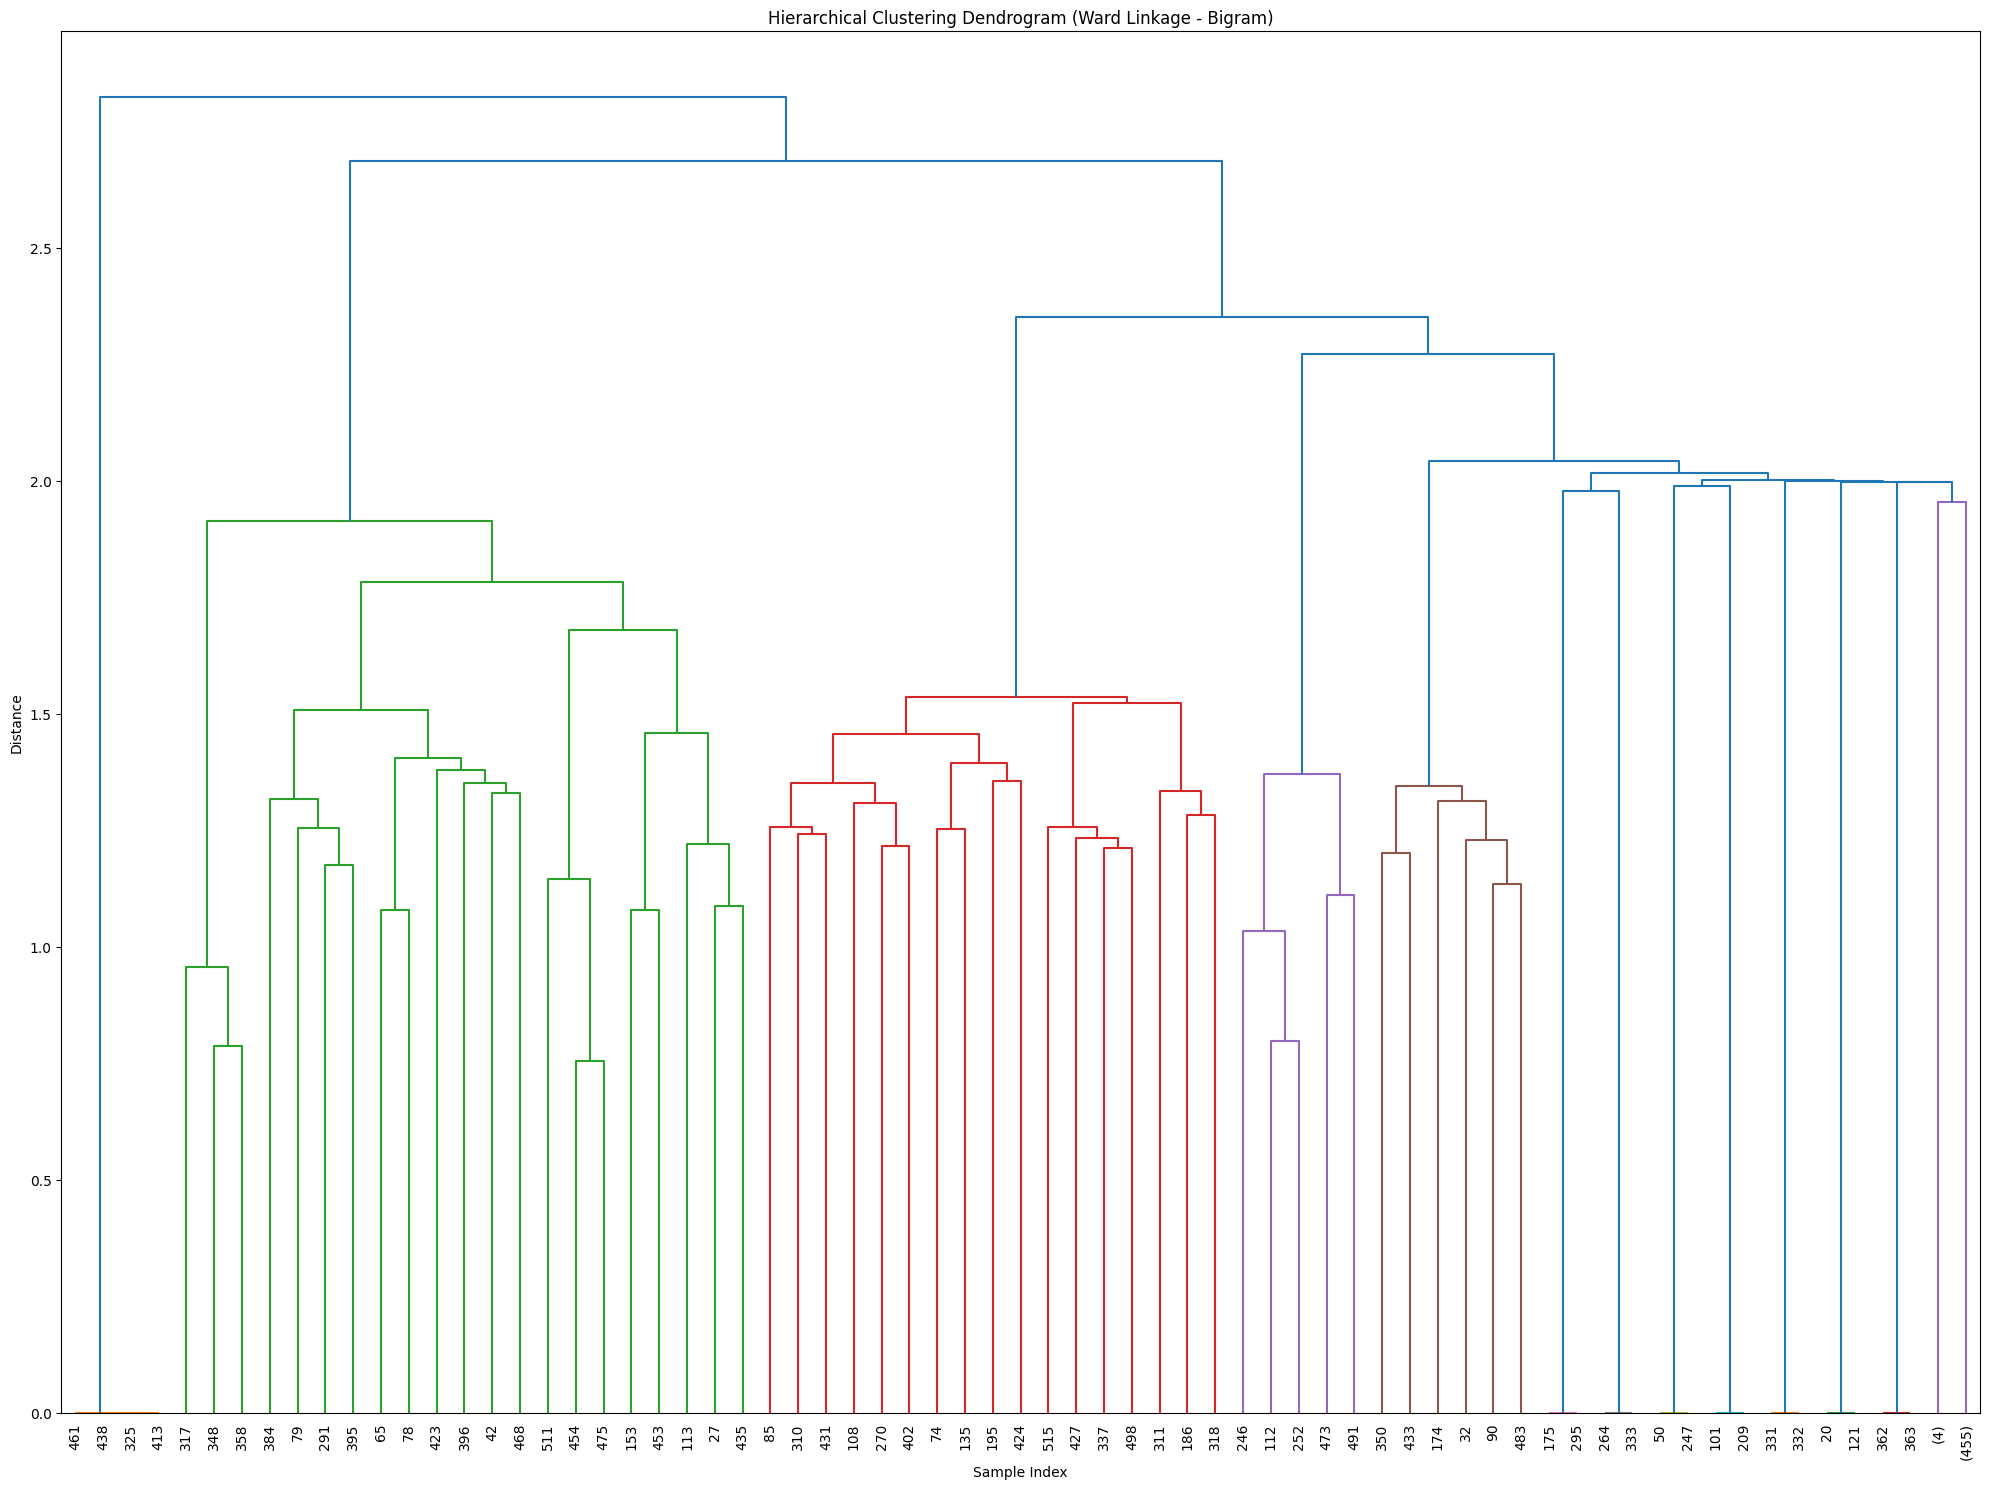

In [ ]:
# ward
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_data = linkage(bigram_matrix.toarray(), method='ward', metric='euclidean')

plt.figure(figsize=(20, 15))
dendrogram(linkage_data, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage - Bigram)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
num_clusters = 2
cluster_labels = fcluster(linkage_data, t=num_clusters, criterion='maxclust')

sil_score = silhouette_score(bigram_matrix.toarray(), cluster_labels, metric='euclidean')

print(f"Ward Silhouette Score: {sil_score:.4f}")

Ward Silhouette Score: 0.0086


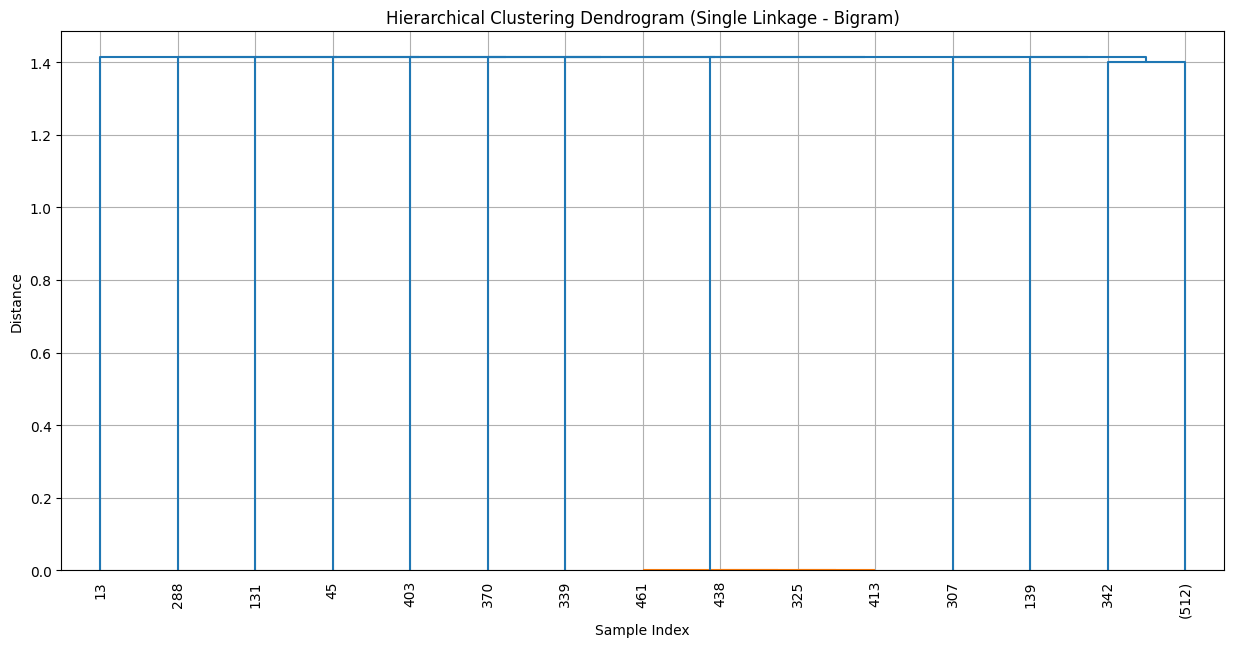

In [ ]:
# Single Linkage
Z_single = linkage(bigram_matrix.toarray(), method='single')

plt.figure(figsize=(15, 7))
dendrogram(Z_single, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage - Bigram)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 11

clustering_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels_single = clustering_single.fit_predict(bigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_single = silhouette_score(bigram_df.to_numpy(), labels_single)
print(f"Single Silhouette Score : {silhouette_avg_single:.2f}")

Single Silhouette Score : 0.01


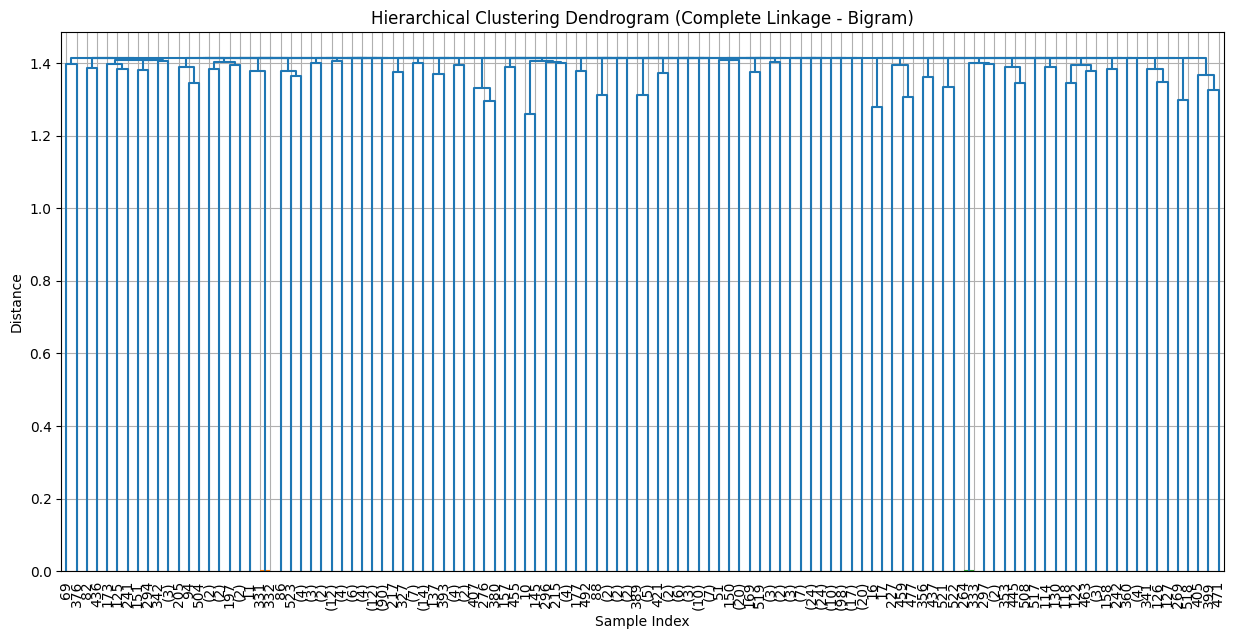

In [ ]:
# Complete Linkage
Z_complete = linkage(bigram_matrix.toarray(), method='complete')

plt.figure(figsize=(15, 7))
dendrogram(Z_complete, truncate_mode='level', p=7, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage - Bigram)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 58

clustering_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels_complete = clustering_complete.fit_predict(bigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_complete = silhouette_score(bigram_df.to_numpy(), labels_complete)
print(f"Complete Silhouette Score : {silhouette_avg_complete:.2f}")

Complete Silhouette Score : 0.02


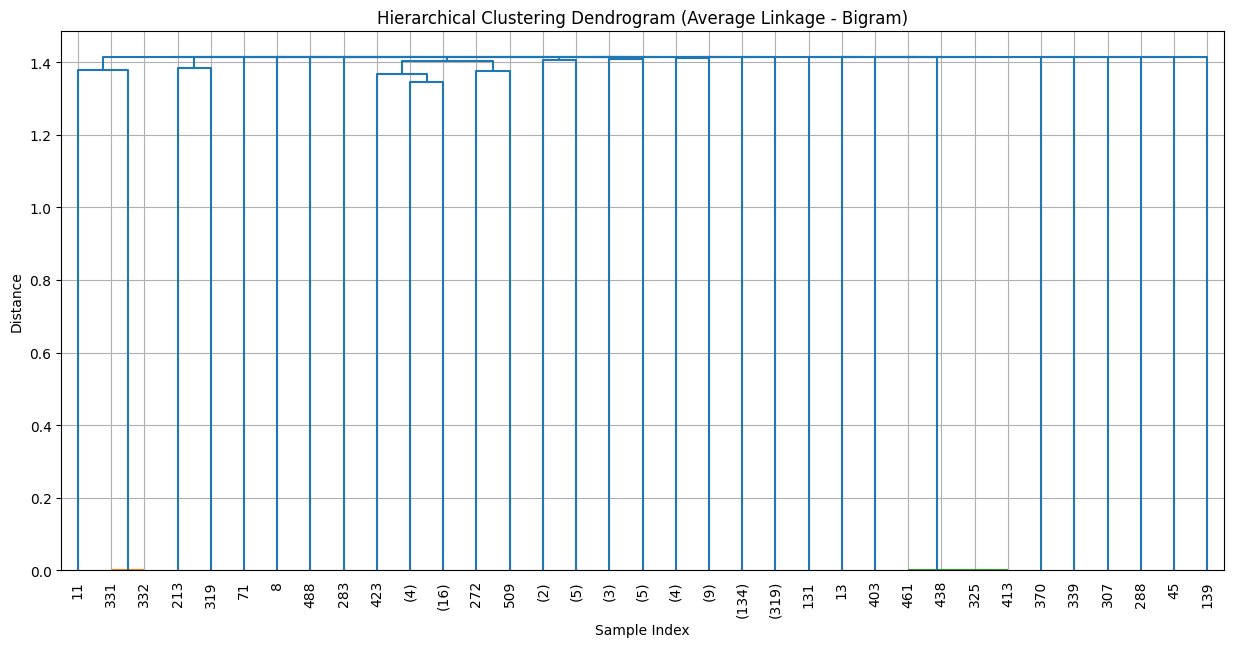

In [ ]:
# Average Linkage
Z_average = linkage(bigram_matrix.toarray(), method='average')

plt.figure(figsize=(15, 7))
dendrogram(Z_average, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage - Bigram)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 22

clustering_average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels_average = clustering_average.fit_predict(bigram_df.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_average = silhouette_score(bigram_df.to_numpy(), labels_average)
print(f"Average Silhouette Score : {silhouette_avg_average:.2f}")

Average Silhouette Score : 0.01


##Word to vec

In [ ]:
!pip install gensim

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = data_df['Key Points Cleaned']
vectorizer = CountVectorizer(token_pattern = '(?u)\\b\\w+\\b')
X = vectorizer.fit_transform(corpus)
X

<526x2905 sparse matrix of type '<class 'numpy.int64'>'
	with 11845 stored elements in Compressed Sparse Row format>

In [ ]:
data_FE = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
data_FE

,abdominal,ability,able,abroad,absorbing,abuse,abusive,academic,academy,acanthamoeba,...,yersinia,yet,york,young,younger,youre,youth,zaire,zoonotic,zoster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [ ]:
sum_tf = data_FE.sum(axis=0)
sum_tf[sum_tf >= 3]

,0
abdominal,3
abroad,4
abuse,5
academic,3
academy,3
...,...
yellow,5
yersinia,3
young,11
younger,4


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from tqdm import tqdm
sentences = [word_tokenize(tweet.lower()) for tweet in tqdm(data_df['Key Points Cleaned'])]


100%|██████████| 526/526 [00:00<00:00, 4022.53it/s]


In [ ]:
import gensim
model = gensim.models.Word2Vec(sentences, min_count=1, vector_size=100, window=5, workers=4)

In [ ]:
model.save('word2vec.w2v')

In [ ]:
model = gensim.models.Word2Vec.load('word2vec.w2v')
w2v = model.wv
word= pd.DataFrame(w2v.index_to_key)
word

,0
0,people
1,health
2,disease
3,infection
4,cause
...,...
535,sheet
536,mean
537,page
538,promote


In [ ]:
w2v_set = set(w2v.index_to_key)
tfidf_set = set(sum_tf[sum_tf >= 3].index)

In [ ]:
# save dataframe of word2vec
w2v = w2v.vectors.transpose()
data_FE = pd.DataFrame(w2v)
data_FE.shape
data_FE

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
0,-0.074972,-0.090864,-0.075946,-0.079023,-0.081074,-0.073804,-0.052145,-0.049161,-0.064215,-0.069631,...,-0.010912,0.000036,-0.016806,-0.010929,-0.008239,-0.012906,-0.000686,-0.006467,0.001613,-0.012602
1,0.215067,0.235588,0.222000,0.209776,0.208990,0.182067,0.165823,0.157919,0.163908,0.174556,...,0.030096,0.029382,0.032621,0.023201,0.037253,0.032328,0.019312,0.030411,0.013602,0.027745
2,0.058887,0.065419,0.048779,0.050939,0.045765,0.045844,0.042446,0.050539,0.043974,0.037927,...,0.008376,0.002396,0.006614,0.002280,0.004735,0.015856,0.000619,0.003174,0.006472,0.002393
3,-0.117170,-0.129911,-0.128758,-0.120959,-0.125578,-0.117696,-0.100265,-0.087311,-0.080716,-0.098307,...,-0.019027,-0.018108,-0.024345,-0.009849,-0.008320,-0.012965,-0.024051,-0.022851,-0.017753,-0.018551
4,0.073359,0.099711,0.093382,0.082071,0.084655,0.059149,0.066245,0.059058,0.067254,0.069714,...,0.012856,0.016854,0.014948,0.017654,0.012610,0.013228,0.020462,0.010998,0.001419,0.006641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.276012,0.292099,0.279850,0.251566,0.253339,0.231812,0.217511,0.204019,0.201872,0.220790,...,0.020647,0.031159,0.036470,0.028506,0.047372,0.036156,0.026282,0.020421,0.019802,0.031412
96,0.237503,0.270815,0.255563,0.235999,0.244089,0.204994,0.206247,0.185569,0.178988,0.198747,...,0.026617,0.019622,0.033520,0.029251,0.044281,0.039826,0.033228,0.032133,0.027757,0.028373
97,-0.306257,-0.324509,-0.302455,-0.287641,-0.284359,-0.260042,-0.245540,-0.231404,-0.207260,-0.246314,...,-0.029075,-0.033138,-0.032170,-0.048467,-0.041581,-0.042686,-0.035497,-0.035449,-0.021274,-0.041723
98,0.172819,0.173338,0.182637,0.157152,0.166416,0.145397,0.135948,0.134803,0.127516,0.155030,...,0.026710,0.014223,0.023140,0.019481,0.022729,0.017942,0.031348,0.018619,0.009579,0.014673


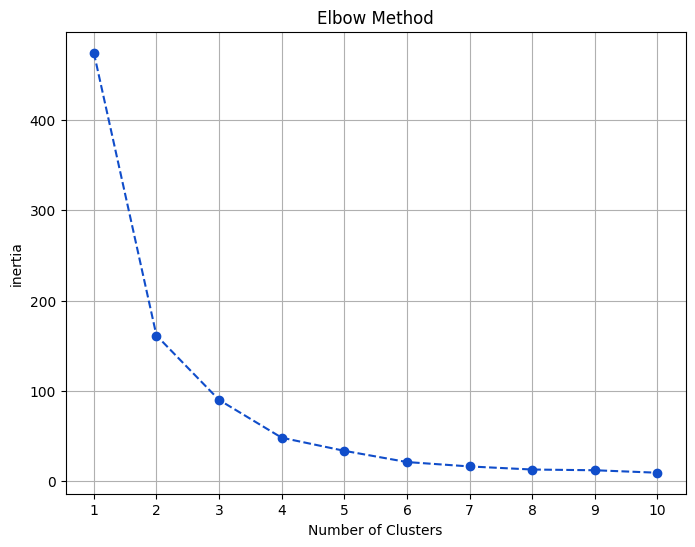

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method untuk menentukan jumlah cluster
inertia = []  # List untuk menyimpan nilai WCSS
max_clusters = 10  # Jumlah maksimal cluster yang akan diuji

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_FE)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--', color='#104DCA')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [ ]:
kn5 = KMeans(n_clusters=2, random_state=1).fit(data_FE)
kn5

KMeans(n_clusters=2, random_state=1)

In [ ]:
# silhouette_score

from sklearn import metrics
labels = kn5.labels_
silhouette_score = metrics.silhouette_score(data_FE, labels, metric='euclidean')
print(f"Word to Vec Silhouette Score: {silhouette_score}")


Word to Vec Silhouette Score: 0.5659024715423584


In [ ]:
if len(data_FE) == len(labels):
    print("Feature matrix and labels are aligned.")
else:
    raise ValueError(f"Inconsistent sizes: {len(data_FE)} features, {len(labels)} labels")


Feature matrix and labels are aligned.


In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from tqdm import tqdm
import numpy as np

def get_document_vector(model, doc):
  doc = [word for word in doc if word in model.wv.key_to_index]
  if doc:
    return np.mean(model.wv[doc], axis=0)
  else:
    return np.zeros(model.vector_size)

# Load model
model = gensim.models.Word2Vec.load('word2vec.w2v')

document_vectors = []
for doc in tqdm(data_df['Key Points Cleaned']):
  vector = get_document_vector(model, word_tokenize(doc.lower()))
  document_vectors.append(vector)

data_df['key points_vector'] = document_vectors
data_df

100%|██████████| 526/526 [00:00<00:00, 2881.68it/s]


,Huruf,Link,Title,Publication Date,Key Points,Key Points Cleaned,Title Cleaned,key points_vector
0,A,https://www.cdc.gov/heart-disease/about/aortic-aneurysm.html,About Aortic Aneurysm,"May 15, 2024","['An aortic aneurysm is a dangerous balloon-like bulge in the aorta, the large artery that carries blood from the heart through the chest and torso.']",aortic aneurysm dangerous balloon like bulge aorta large artery carry blood heart chest torso,aortic aneurysm,"[-0.024872318, 0.07287687, 0.013380199, -0.045088366, 0.030525932, -0.14902343, 0.083416425, 0.18747275, -0.06821602, -0.067893, -0.08086398, -0.14378427, -0.047100026, 0.0685642, -0.0066540632, -0.12306311, 0.021506479, -0.13022111, -0.036513325, -0.25606748, 0.019143356, 0.03696688, 0.03322255, -0.03864315, -0.033908453, 0.02583851, -0.07144607, -0.12454855, -0.13662532, 0.03807998, 0.13204278, 0.049673826, 0.01732347, -0.068442084, -0.05999512, 0.14691542, 0.0056120898, -0.08920791, -0.04464425, -0.22439724, 0.0384763, -0.14494336, -0.032505292, -0.049347688, 0.12898971, -0.054288413, -0.053918526, -0.036653936, 0.087064974, 0.043414444, 0.065086, -0.124938495, 0.00032233787, -0.015720425, -0.109346874, 0.090230525, 0.062569775, -0.011241457, -0.16706832, 0.04007875, 0.020536298, 0.03694249, 0.031507585, -0.08552027, -0.20343167, 0.06929017, 0.11125711, 0.056203138, -0.1442471, 0.15629661, -0.06881683, -0.00870444, 0.06913849, -0.0061872285, 0.12944503, 0.09871605, -0.018564912, -0.035530467, -0.09421712, 0.051153306, -0.033830885, 0.00064983993, -0.11499467, 0.16879474, -0.05781276, 0.057280257, 0.010959667, 0.12669322, 0.10833529, 0.011371769, 0.16424666, 0.09479052, 0.017966267, 0.071242586, 0.19209969, 0.092821, 0.08464038, -0.10405961, 0.057567652, -0.044715334]"
1,A,https://www.cdc.gov/child-abuse-neglect/about/index.html,About Child Abuse and Neglect,"May 16, 2024","['Child abuse and neglect are serious public health problems.', 'Child abuse and neglect can have long-term impacts on health, opportunity, and well-being.']",child abuse neglect serious public health problem child abuse neglect long term impact health opportunity well,child abuse neglect,"[-0.04169933, 0.12345192, 0.03173892, -0.07110817, 0.049639825, -0.25744644, 0.13537656, 0.31261757, -0.11763049, -0.11673027, -0.13482343, -0.25030667, -0.079295434, 0.111774385, -0.007927557, -0.19968683, 0.038881976, -0.21918374, -0.058299597, -0.42918876, 0.022925735, 0.066720255, 0.055108856, -0.06362406, -0.05953485, 0.042817753, -0.11932242, -0.20906343, -0.23195577, 0.070522465, 0.22237283, 0.08173133, 0.033025224, -0.12212936, -0.10604515, 0.24539377, 0.0059488826, -0.14278786, -0.06806951, -0.38329172, 0.06084534, -0.24237329, -0.058265056, -0.084908344, 0.21819788, -0.091882885, -0.0905766, -0.06709189, 0.14370994, 0.07901242, 0.107738115, -0.2123661, 0.003792936, -0.029565612, -0.17911875, 0.15797989, 0.106667556, -0.021864051, -0.27851394, 0.06415711, 0.027623938, 0.06369997, 0.054463446, -0.1406735, -0.33943832, 0.11749167, 0.19431072, 0.08861643, -0.2408176, 0.2632243, -0.11177803, -0.009754242, 0.117889315, -0.0009090576, 0.21964037, 0.16346654, -0.030229652, -0.056222096, -0.14734276, 0.08674187, -0.053417813, -0.0017926224, -0.18612339, 0.27923447, -0.09916218, 0.08950461, 0.008743207, 0.21671484, 0.18214299, 0.018052695, 0.27207157, 0.15531722, 0.031009257, 0.110184364, 0.31540677, 0.15422955, 0.13908403, -0.1742757, 0.09600849, -0.072841294]"
2,A,https://www.cdc.gov/elder-abuse/about/index.html,About Abuse of Older Persons,"November 7, 2024","['Many older adults require care and are vulnerable to violence perpetrated by a caregiver or someone they trust.', 'More research is needed to uncover the causes for, and solutions to, violence against older adults.']",many older adult require care vulnerable violence perpetrated caregiver someone trust research needed uncover cause solution violence older adult,abuse older person,"[-0.033710167, 0.08819094, 0.025974454, -0.05487571, 0.032435708, -0.1845300

In [ ]:
import pandas as pd
save = data_df.to_csv('key points vector.csv', index=False)

### Hierarichal dendogram word2vec

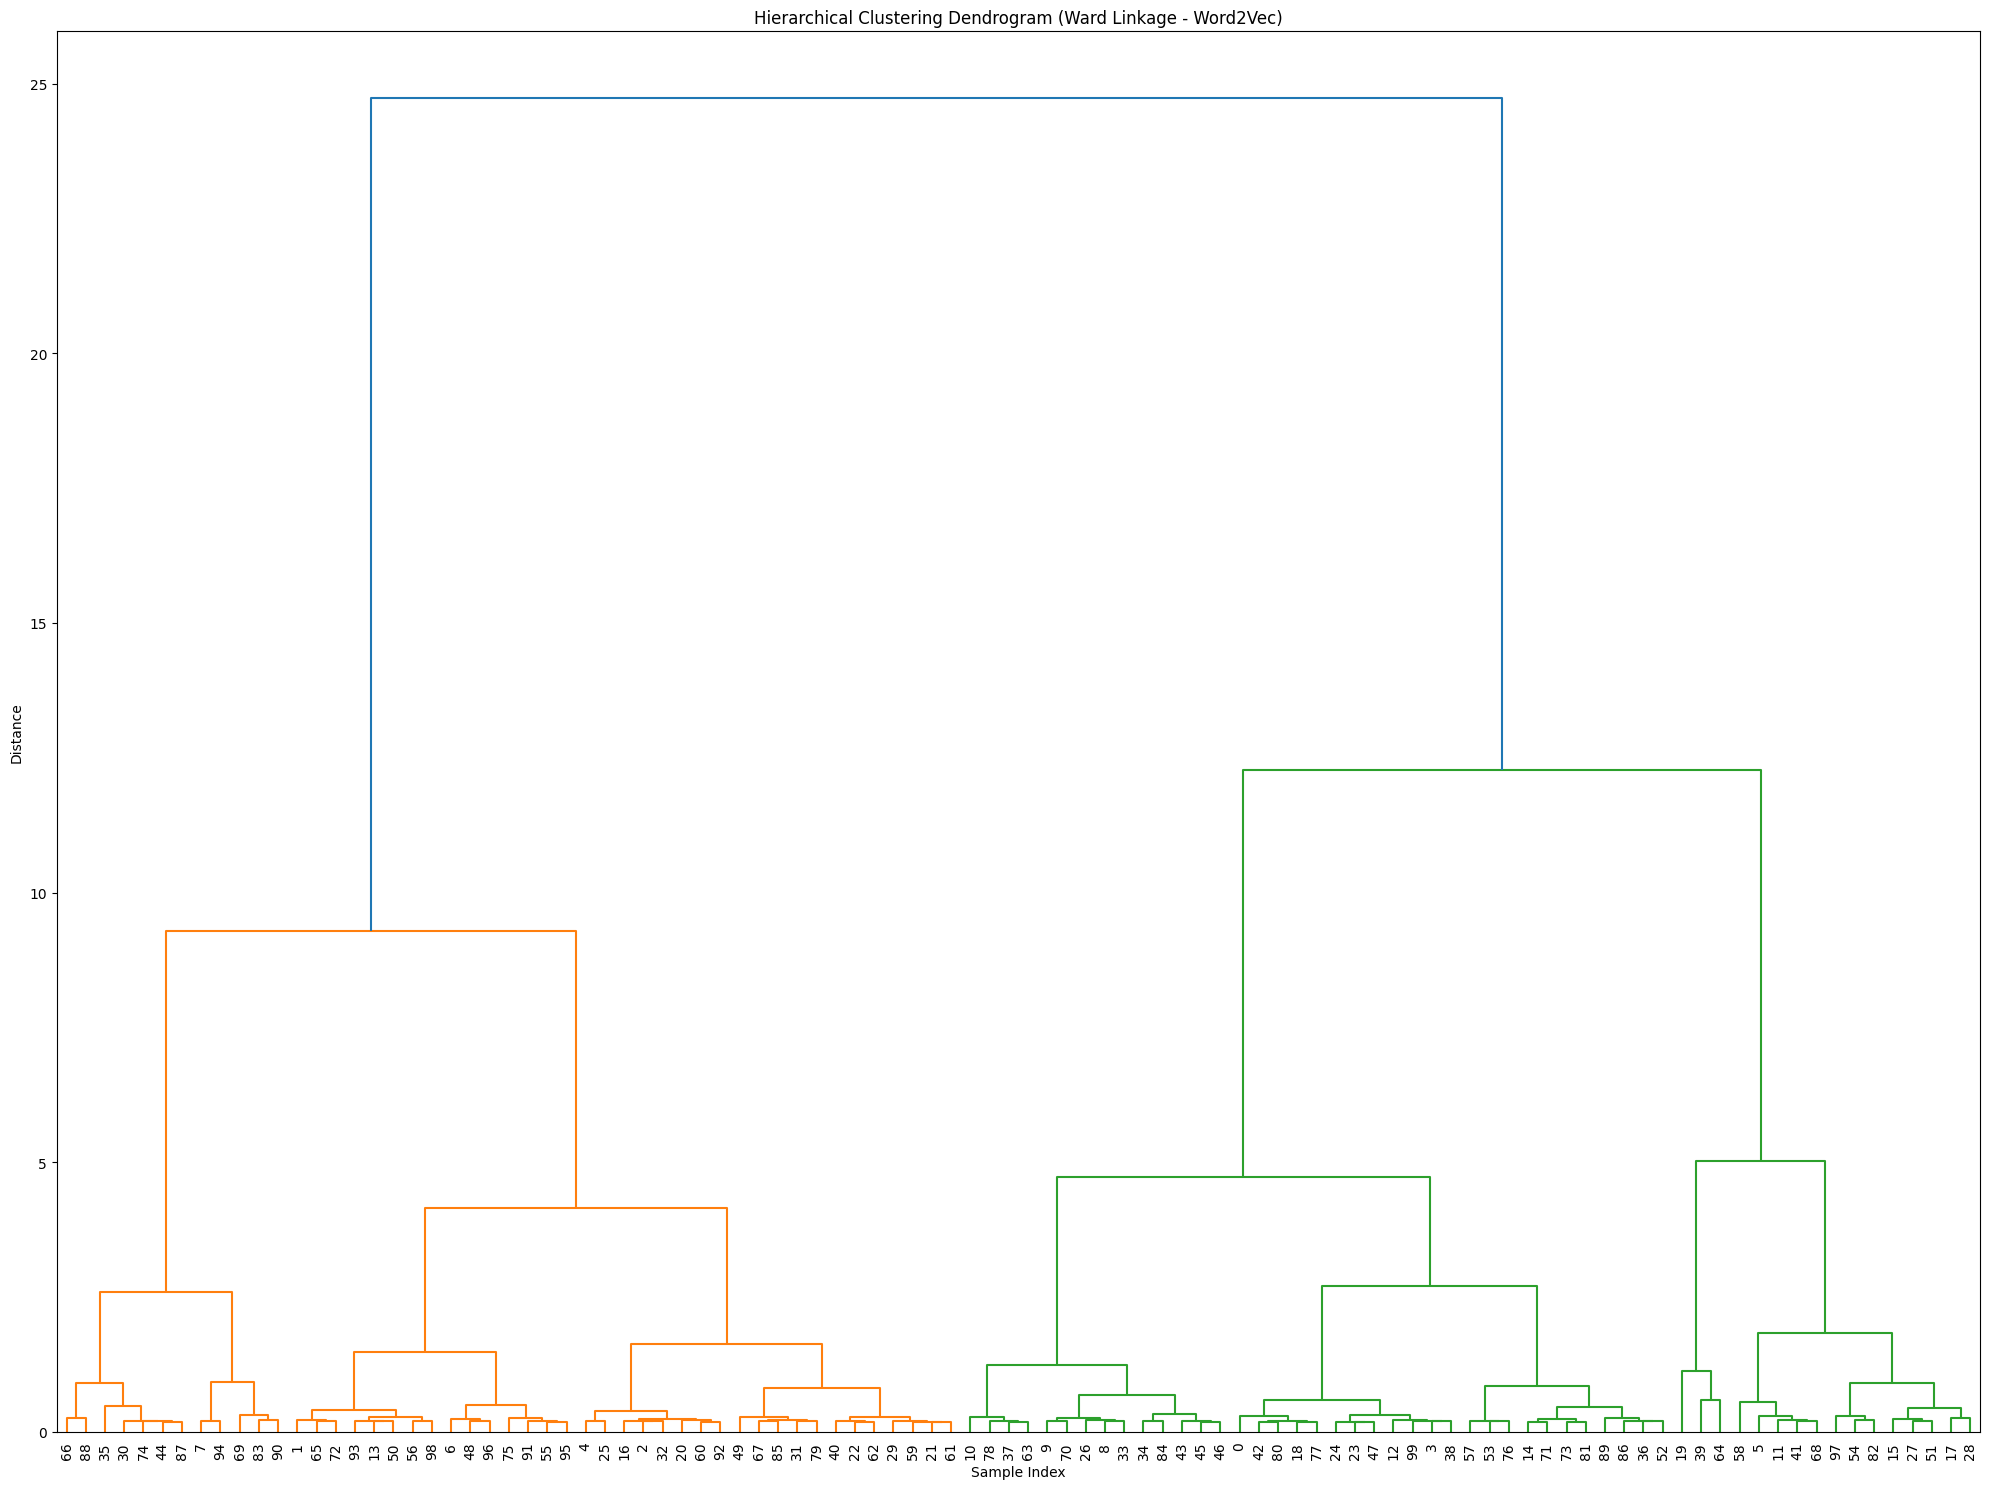

In [ ]:
# ward
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_data = linkage(data_FE.to_numpy(), method='ward', metric='euclidean')

plt.figure(figsize=(20, 15))
dendrogram(linkage_data, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage - Word2Vec)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2

clustering_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_ward = clustering_ward.fit_predict(data_FE.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_ward = silhouette_score(data_FE.to_numpy(), labels_ward)
print(f"Ward Silhouette Score : {silhouette_avg_ward:.2f}")

Ward Silhouette Score : 0.55


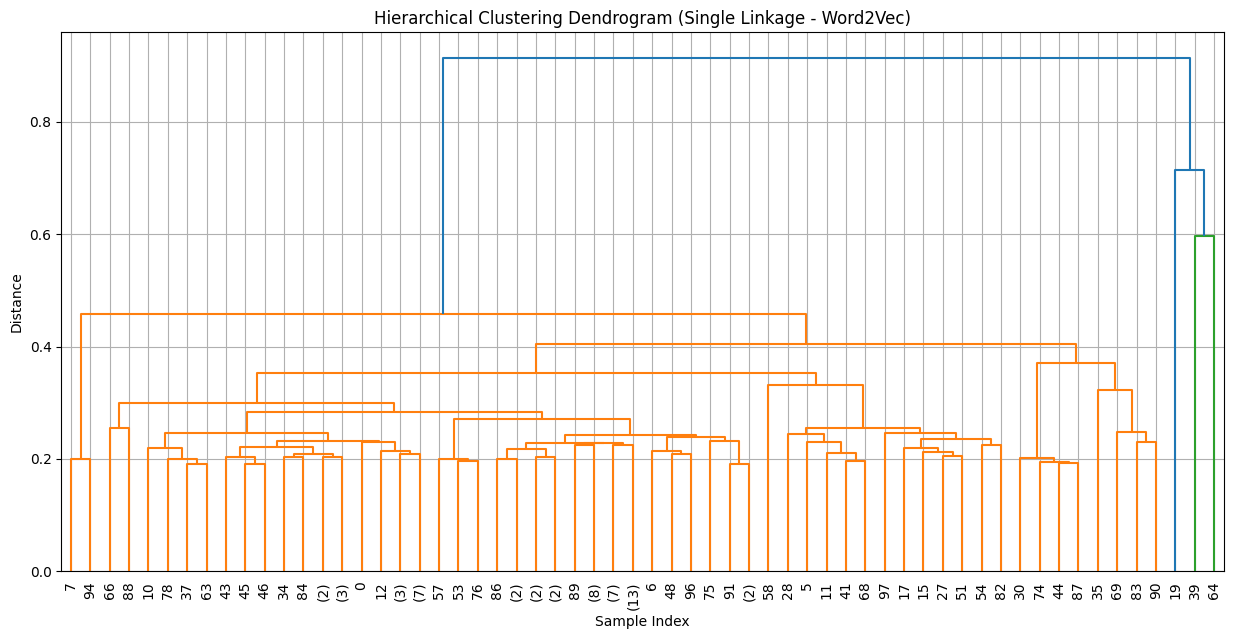

In [ ]:
# Single Linkage
Z_single = linkage(data_FE.to_numpy(), method='single')

plt.figure(figsize=(15, 7))
dendrogram(Z_single, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage - Word2Vec)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2

clustering_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels_single = clustering_single.fit_predict(data_FE.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_single = silhouette_score(data_FE.to_numpy(), labels_single)
print(f"Single Silhouette Score : {silhouette_avg_single:.2f}")

Single Silhouette Score : 0.51


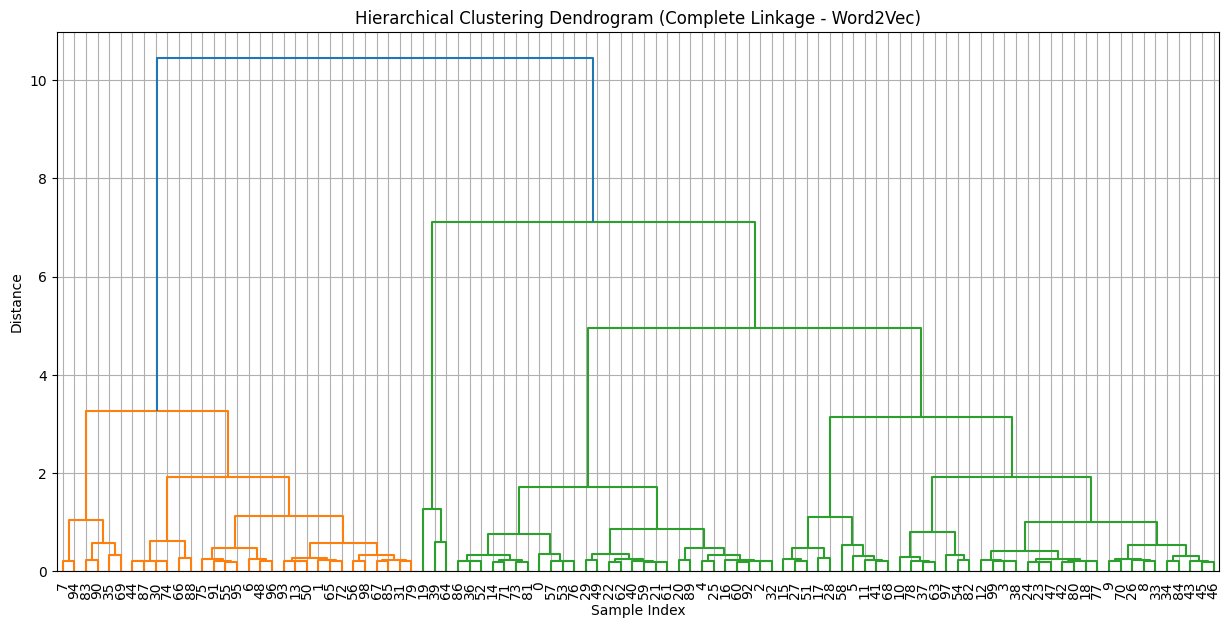

In [ ]:
# Complete Linkage
Z_complete = linkage(data_FE.to_numpy(), method='complete')

plt.figure(figsize=(15, 7))
dendrogram(Z_complete, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage - Word2Vec)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2

clustering_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels_complete = clustering_complete.fit_predict(data_FE.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_complete = silhouette_score(data_FE.to_numpy(), labels_complete)
print(f"Complete Silhouette Score : {silhouette_avg_complete:.2f}")

Complete Silhouette Score : 0.47


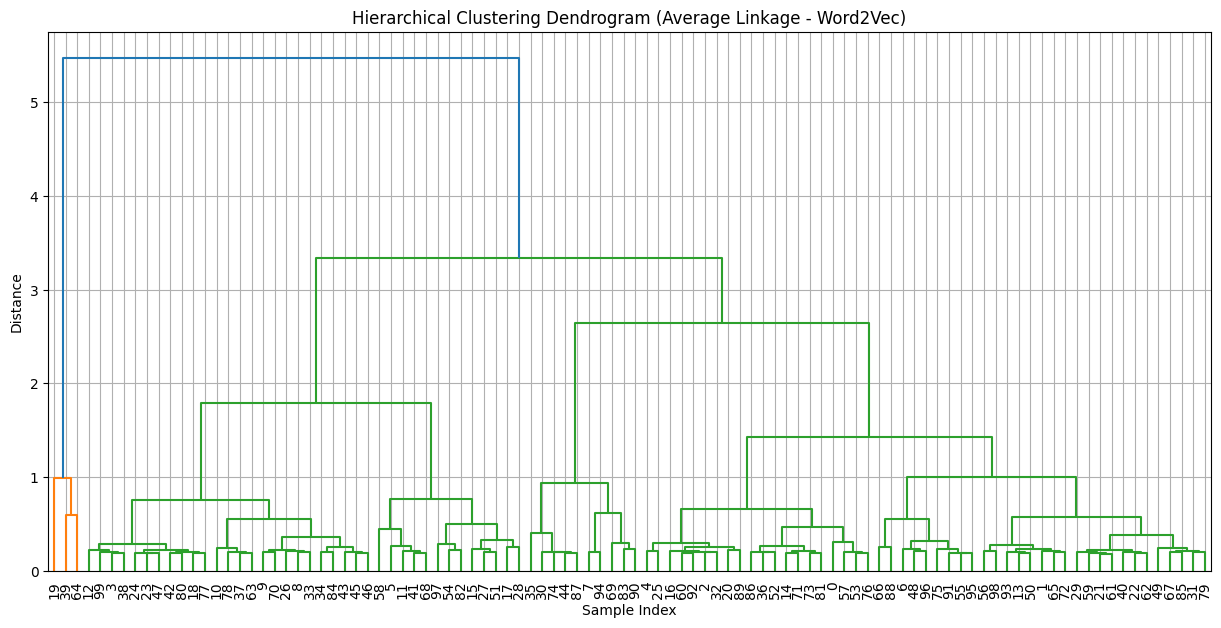

In [ ]:
# Average Linkage
Z_average = linkage(data_FE.to_numpy(), method='average')

plt.figure(figsize=(15, 7))
dendrogram(Z_average, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage - Word2Vec)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2

clustering_average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels_average = clustering_average.fit_predict(data_FE.to_numpy())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_average = silhouette_score(data_FE.to_numpy(), labels_average)
print(f"Average Silhouette Score : {silhouette_avg_average:.2f}")

Average Silhouette Score : 0.51


# TRAIN TEST

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, silhouette_score
import numpy as np
import pandas as pd


X = data_FE.to_numpy()
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN Model Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Model Evaluation:
Accuracy: 0.9000
Precision: 0.9200
Recall: 0.9000
F1-Score: 0.9010
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20




# Implementasi Search Menggunakan metric cosine similarity

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from nltk.tokenize import word_tokenize
import gensim

# Fungsi Preprocessing (Tokenisasi)
def preprocess_input(text):
    return word_tokenize(text.lower())

# Load Word2Vec Model
model = gensim.models.Word2Vec.load('word2vec.w2v')

# Fungsi untuk Mendapatkan Vektor dari Token
def get_word2vec_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Membuat Representasi Vektor untuk Artikel
article_vectors = np.array(data_df['key points_vector'].tolist())

# Melatih Model KNN
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(article_vectors)

# Input Pengguna
user_input = input("Masukkan topik atau kalimat untuk mencari artikel terkait: ")

# Tokenisasi Input Pengguna
user_tokens = preprocess_input(user_input)

# Membuat Vektor dari Input Pengguna
user_vector = get_word2vec_vector(user_tokens, model)

# Menggunakan KNN untuk Mencari Artikel Paling Relevan
distances, indices = knn_model.kneighbors([user_vector])

print("\nArtikel yang relevan dengan input Anda:")
for i, idx in enumerate(indices[0]):
    print(f"Artikel {i + 1}: {data_df.iloc[idx]['Title']}")
    print(f"Similarity Score: {1 - distances[0][i]:.4f}")
    print(f"Link: {data_df.iloc[idx]['Link']}")
    print('-' * 100)


Masukkan topik atau kalimat untuk mencari artikel terkait: disorder

Artikel yang relevan dengan input Anda:
Artikel 1: About MicrobeNet
Similarity Score: 0.9921
Link: https://www.cdc.gov/microbenet/php/about/index.html
----------------------------------------------------------------------------------------------------
Artikel 2: About Strongyloides
Similarity Score: 0.9920
Link: https://www.cdc.gov/strongyloides/about/
----------------------------------------------------------------------------------------------------
Artikel 3: About Peripheral Arterial Disease (PAD)
Similarity Score: 0.9918
Link: https://www.cdc.gov/heart-disease/about/peripheral-arterial-disease.html
----------------------------------------------------------------------------------------------------
Artikel 4: Clinical Laboratory Improvement Advisory Committee (CLIAC)
Similarity Score: 0.9918
Link: https://www.cdc.gov/faca/committees/cliac.html
-----------------------------------------------------------------------